In [1]:
# import scipy.signals
import numpy as np
import matplotlib.pyplot as plt

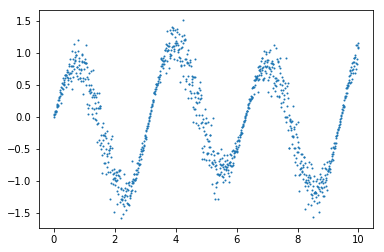

In [2]:
x = np.arange(0, 10, 0.01)
y = np.sin(x*2)+np.random.normal(-.25,.25, x.shape[0])*np.sin(x)
plt.scatter(x, y, s=1)
plt.show()

(1000,)


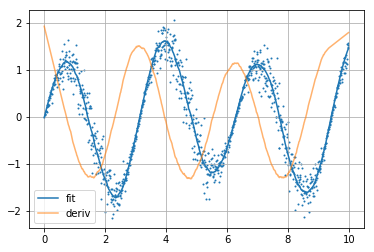

In [3]:
from scipy.signal import savgol_filter
print(x.shape)
d1 = savgol_filter(y, window_length=101, polyorder=3)
d2 = savgol_filter(y, window_length=131, polyorder=2, deriv=1)
plt.scatter(x, y/np.std(y), s=1)
plt.plot(x, d1/np.std(d1), label='fit')
plt.plot(x, d2/np.std(d2), label='deriv', alpha=.6)
plt.grid()
plt.legend()
plt.show()

/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  position = data[0].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:174: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  voltage = data[2].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_raw = raw_data[1].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:189: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_raw = raw_data[3].as_matrix()


[6.374448 3.294426 5.409362 ... 6.829517 6.817896 6.817896]
[0.00637445 0.00329443 0.00540936 ... 0.00682952 0.0068179  0.0068179 ]
[datetime.datetime(2019, 4, 26, 17, 11, 53, 310000)
 datetime.datetime(2019, 4, 26, 17, 11, 53, 320000)
 datetime.datetime(2019, 4, 26, 17, 11, 53, 330000) ...
 datetime.datetime(2019, 4, 26, 17, 12, 28, 620000)
 datetime.datetime(2019, 4, 26, 17, 12, 28, 630000)
 datetime.datetime(2019, 4, 26, 17, 12, 28, 640000)]
shift: 11


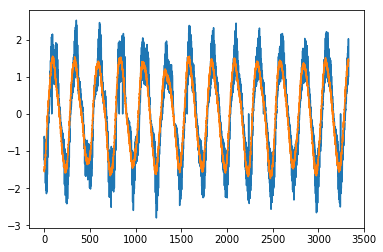

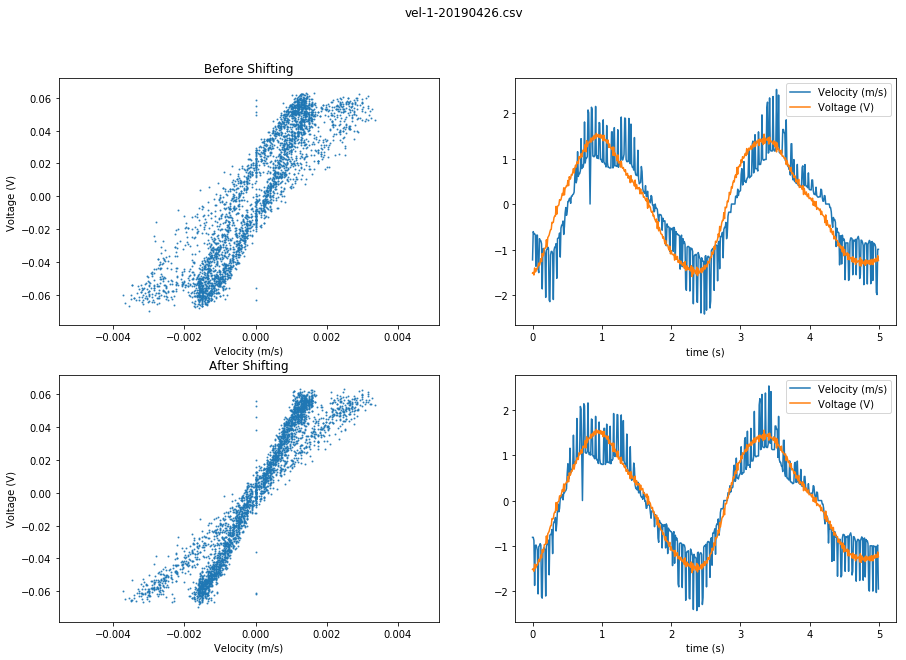

LinregressResult(slope=28.28223521155314, intercept=8.020131030808458e-05, rvalue=0.936378056000628, pvalue=0.0, stderr=0.1840167769750768)


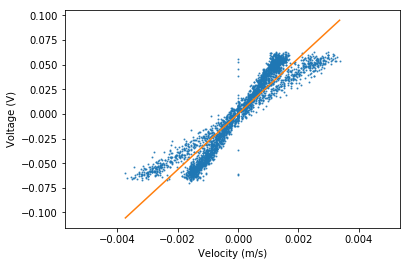

LinregressResult(slope=28.28223521155314, intercept=8.020131030808458e-05, rvalue=0.936378056000628, pvalue=0.0, stderr=0.1840167769750768)


In [4]:
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload
import numpy as np
import mxp_tools.labs.watt_balance

reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('vel-1-20190426.csv', [100,-100])
V.data.use_savgol = False
V.process()
# display(V.data['shifted'].shape)
plt.show()

shift: -59
shift: -59


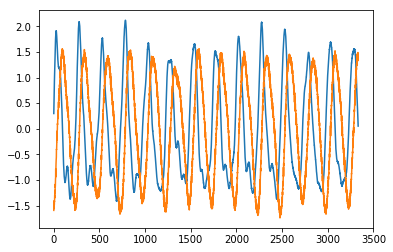

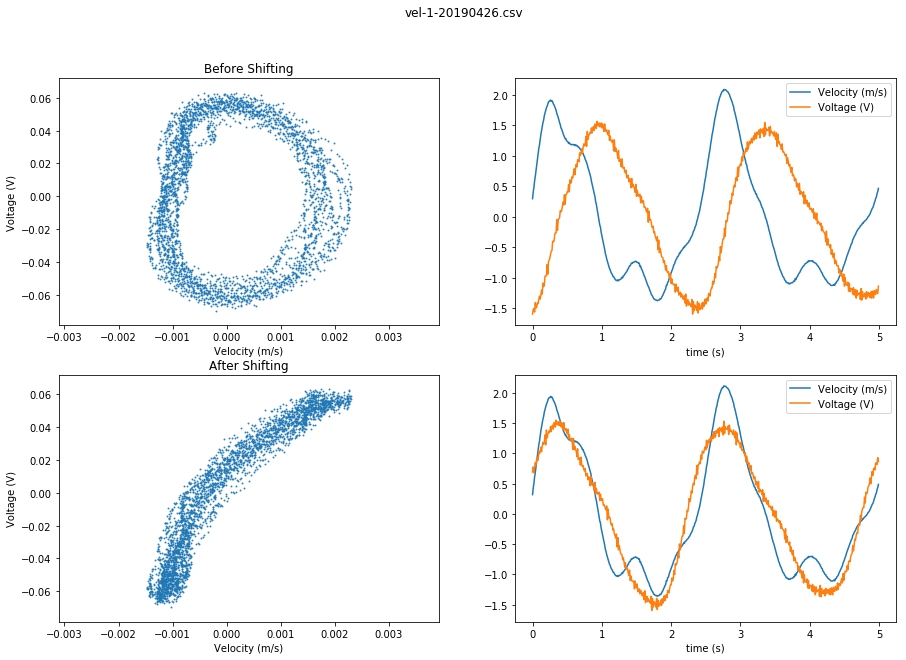

LinregressResult(slope=35.623056343296874, intercept=4.2121342544067654e-05, rvalue=0.9376294212341182, pvalue=0.0, stderr=0.23086186299676123)


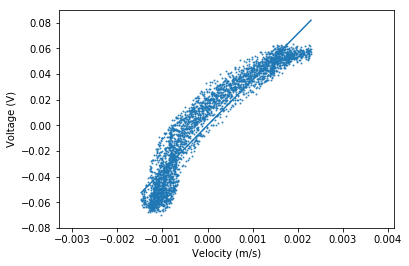

LinregressResult(slope=35.623056343296874, intercept=4.2121342544067654e-05, rvalue=0.9376294212341182, pvalue=0.0, stderr=0.23086186299676123)


In [5]:
V.data.use_savgol = True
V.data.process()
V.process()

shift: -59
LinregressResult(slope=35.74731766266763, intercept=0.00030556145735412764, rvalue=0.9330286000642624, pvalue=0.0, stderr=0.3591790176532815)


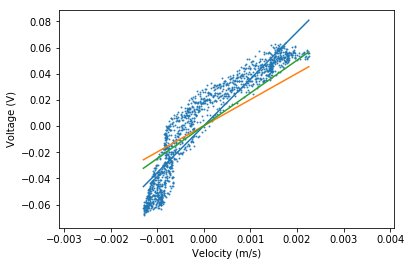

LinregressResult(slope=35.74731766266763, intercept=0.00030556145735412764, rvalue=0.9330286000642624, pvalue=0.0, stderr=0.3591790176532815)


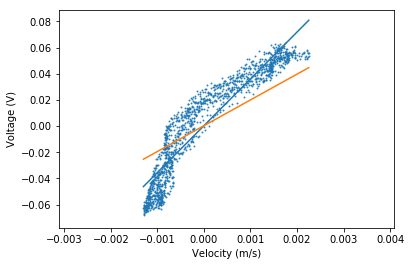

In [6]:
V = VelocityMode('vel-1-20190426.csv', [1000,-1000])
V.data.process()
fig = plt.figure()
ax = fig.add_subplot(111)
xy = V.data.stage2
# xy = xy[np.where(xy[:,0]>0)[0]]
# print(np.where(xy[:,0]>0))
V.plot_xy_with_regression(xy, ax, [20, 25])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
xy = V.data.stage2
slope = V.data.regress(xy[np.where(xy[:,0]>0)[0]])
# print(np.where(xy[:,0]>0))

V.plot_xy_with_regression(xy, ax, [slope.slope])
plt.show()

['vel-1-20190426.csv', '20190429-vel-1.csv', '20190429-vel-2.csv']
vel-1-20190426.csv
[6.374448 3.294426 5.409362 ... 6.829517 6.817896 6.817896]
[0.00637445 0.00329443 0.00540936 ... 0.00682952 0.0068179  0.0068179 ]
[0.00637445 0.00329443 0.00540936 ... 0.00682952 0.0068179  0.0068179 ]
shift: 10
LinregressResult(slope=30.816934467552333, intercept=0.0012872845316776113, rvalue=0.9531011851361028, pvalue=0.0, stderr=0.2376888885557785)


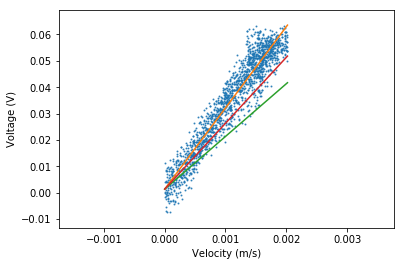

20190429-vel-1.csv
[7.99 4.39 4.87 ... 7.1  7.12 7.12]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
shift: 11
LinregressResult(slope=31.410956405474625, intercept=0.0004976422650257439, rvalue=0.9665446767049807, pvalue=0.0, stderr=0.1323132086894393)


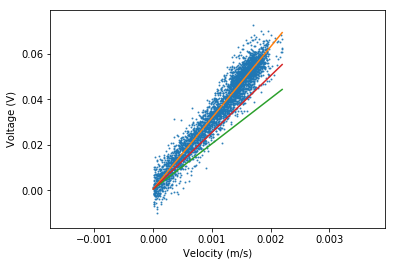

20190429-vel-2.csv
[3.97 3.97 6.12 ... 6.86 6.86 6.86]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
shift: 11
LinregressResult(slope=31.912894436119405, intercept=0.00014636579117918713, rvalue=0.9522887624289801, pvalue=0.0, stderr=0.25730685753374427)


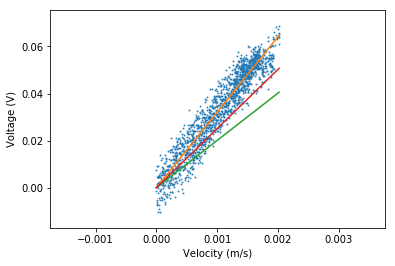

In [41]:
import os
names = [
    'vel-1-20190426.csv',
    '20190429-vel-1.csv',
    '20190429-vel-2.csv'
]

print(names)
for name in names:
    print(name)
    V = VelocityMode(name, [100,-100])
    V.data.process()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    xy = V.data.stage2
    xy = xy[np.where(xy[:,0]>0)[0]]
    # print(np.where(xy[:,0]>0))
    V.plot_xy_with_regression(xy, ax, [20, 25])
    plt.show()

['20190429-vel-1.csv', '20190429-vel-2.csv', '20190429-vel-3.csv', '20190429-vel-4.csv', '20190429-vel-5.csv', '20190429-vel-6.csv', '20190429-vel-7.csv', '20190429-vel-8.csv', '20190429-vel-9.csv', '20190429-vel-10.csv', '20190429-vel-11.csv', '20190429-vel-12.csv', '20190429-vel-13.csv', '20190429-vel-14.csv']
20190429-vel-1.csv
[7.99 4.39 4.87 ... 7.1  7.12 7.12]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
[datetime.datetime(2019, 4, 29, 9, 56, 13, 390000)
 datetime.datetime(2019, 4, 29, 9, 56, 13, 400000)
 datetime.datetime(2019, 4, 29, 9, 56, 13, 410000) ...
 datetime.datetime(2019, 4, 29, 9, 57, 33, 380000)
 datetime.datetime(2019, 4, 29, 9, 57, 33, 390000)
 datetime.datetime(2019, 4, 29, 9, 57, 33, 400000)]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
shift: 11
0.029891779078280594
LinregressResult(slope=33.45401414152031, intercept=1.7296074861228306e-06, rvalue=0.9965152553124097, pvalue=0.0, stderr=0.033742017158805135)


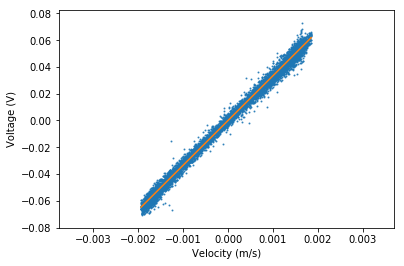

20190429-vel-2.csv
[3.97 3.97 6.12 ... 6.86 6.86 6.86]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
[datetime.datetime(2019, 4, 29, 13, 9, 52, 730000)
 datetime.datetime(2019, 4, 29, 13, 9, 52, 740000)
 datetime.datetime(2019, 4, 29, 13, 9, 52, 750000) ...
 datetime.datetime(2019, 4, 29, 13, 10, 25, 490000)
 datetime.datetime(2019, 4, 29, 13, 10, 25, 501000)
 datetime.datetime(2019, 4, 29, 13, 10, 25, 510000)]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
shift: 11
0.029576091872730314
LinregressResult(slope=33.81109324055143, intercept=-1.5473510640811542e-05, rvalue=0.994885918030633, pvalue=0.0, stderr=0.07377340928619813)


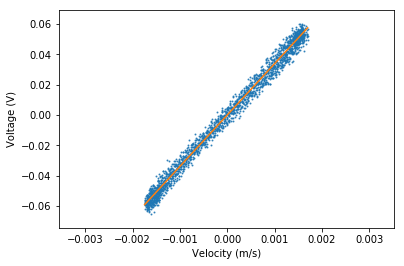

20190429-vel-3.csv
[4.87 4.24 5.08 ... 4.95 4.97 4.99]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
[datetime.datetime(2019, 4, 29, 13, 15, 43, 450000)
 datetime.datetime(2019, 4, 29, 13, 15, 43, 460000)
 datetime.datetime(2019, 4, 29, 13, 15, 43, 470000) ...
 datetime.datetime(2019, 4, 29, 13, 16, 32, 20000)
 datetime.datetime(2019, 4, 29, 13, 16, 32, 30000)
 datetime.datetime(2019, 4, 29, 13, 16, 32, 40000)]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
shift: 11
0.02309734610751784
LinregressResult(slope=43.29501732991372, intercept=-9.324777860858801e-05, rvalue=0.9951004630840454, pvalue=0.0, stderr=0.07027308907861653)


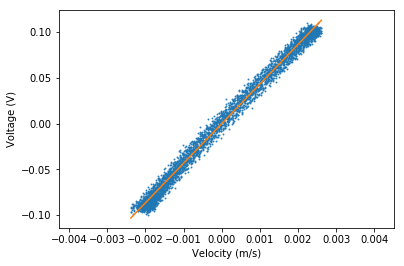

20190429-vel-4.csv
[3.79 3.77 4.95 ... 5.01 5.03 5.04]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
[datetime.datetime(2019, 4, 29, 13, 22, 53, 400000)
 datetime.datetime(2019, 4, 29, 13, 22, 53, 410000)
 datetime.datetime(2019, 4, 29, 13, 22, 53, 420000) ...
 datetime.datetime(2019, 4, 29, 13, 23, 28, 950000)
 datetime.datetime(2019, 4, 29, 13, 23, 28, 960000)
 datetime.datetime(2019, 4, 29, 13, 23, 28, 970000)]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
shift: 11
0.01837061167550762
LinregressResult(slope=54.43476883969176, intercept=-4.2958482919554664e-05, rvalue=0.992991166698233, pvalue=0.0, stderr=0.13124379674121825)


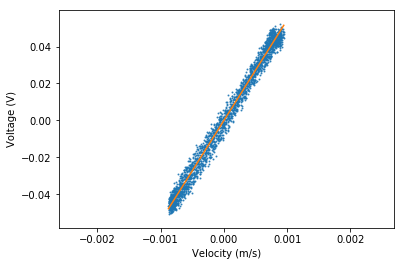

20190429-vel-5.csv
[3.42 4.87 5.78 ... 5.17 5.15 5.15]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
[datetime.datetime(2019, 4, 29, 13, 23, 42, 630000)
 datetime.datetime(2019, 4, 29, 13, 23, 42, 640000)
 datetime.datetime(2019, 4, 29, 13, 23, 42, 650000) ...
 datetime.datetime(2019, 4, 29, 13, 24, 9, 610000)
 datetime.datetime(2019, 4, 29, 13, 24, 9, 620000)
 datetime.datetime(2019, 4, 29, 13, 24, 9, 630000)]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
shift: 11
0.02552320763698231
LinregressResult(slope=39.18002839701982, intercept=8.145268846533344e-06, rvalue=0.9993384966779498, pvalue=0.0, stderr=0.03577964758271953)


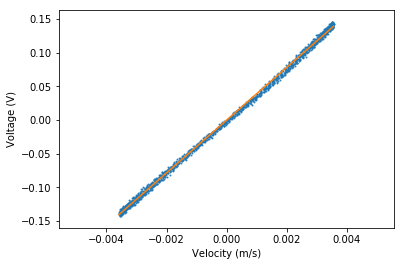

20190429-vel-6.csv
[4.64 3.86 5.25 ... 4.84 4.81 4.81]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
[datetime.datetime(2019, 4, 29, 13, 24, 27, 100000)
 datetime.datetime(2019, 4, 29, 13, 24, 27, 110000)
 datetime.datetime(2019, 4, 29, 13, 24, 27, 120000) ...
 datetime.datetime(2019, 4, 29, 13, 24, 58, 290000)
 datetime.datetime(2019, 4, 29, 13, 24, 58, 300000)
 datetime.datetime(2019, 4, 29, 13, 24, 58, 310000)]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
shift: 11
0.024456591667951024
LinregressResult(slope=40.88877197514171, intercept=-2.19491655292374e-05, rvalue=0.9982177855609391, pvalue=0.0, stderr=0.05453686691365872)


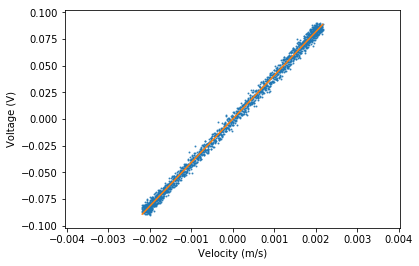

20190429-vel-7.csv
[4.09 4.71 5.63 ... 6.34 6.34 6.32]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
[datetime.datetime(2019, 4, 29, 13, 35, 59, 850000)
 datetime.datetime(2019, 4, 29, 13, 35, 59, 860000)
 datetime.datetime(2019, 4, 29, 13, 35, 59, 870000) ...
 datetime.datetime(2019, 4, 29, 13, 36, 46, 10000)
 datetime.datetime(2019, 4, 29, 13, 36, 46, 20000)
 datetime.datetime(2019, 4, 29, 13, 36, 46, 30000)]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
shift: 11
0.026633433943755457
LinregressResult(slope=37.54679182984072, intercept=-4.586648505159302e-05, rvalue=0.9969032618201653, pvalue=0.0, stderr=0.05002010734634317)


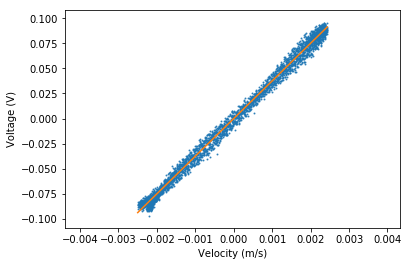

20190429-vel-8.csv
[3.74 4.24 5.39 ... 5.9  5.94 5.94]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
[datetime.datetime(2019, 4, 29, 13, 44, 42, 680000)
 datetime.datetime(2019, 4, 29, 13, 44, 42, 691000)
 datetime.datetime(2019, 4, 29, 13, 44, 42, 700000) ...
 datetime.datetime(2019, 4, 29, 13, 45, 23, 290000)
 datetime.datetime(2019, 4, 29, 13, 45, 23, 301000)
 datetime.datetime(2019, 4, 29, 13, 45, 23, 310000)]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
shift: 11
0.025589030254182576
LinregressResult(slope=39.079245679368725, intercept=-5.360251220265359e-05, rvalue=0.998735669086947, pvalue=0.0, stderr=0.03620921141293747)


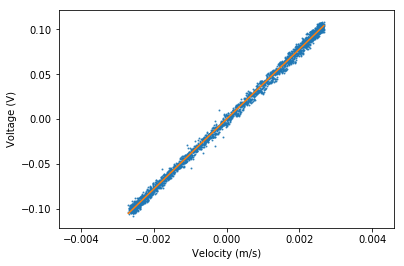

20190429-vel-9.csv
[4.31 4.36 5.59 ... 5.49 5.49 5.46]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
[datetime.datetime(2019, 4, 29, 13, 48, 24, 790000)
 datetime.datetime(2019, 4, 29, 13, 48, 24, 800000)
 datetime.datetime(2019, 4, 29, 13, 48, 24, 810000) ...
 datetime.datetime(2019, 4, 29, 13, 48, 58, 880000)
 datetime.datetime(2019, 4, 29, 13, 48, 58, 890000)
 datetime.datetime(2019, 4, 29, 13, 48, 58, 900000)]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
shift: 11
0.023758975483782075
LinregressResult(slope=42.089356954074134, intercept=-3.4965677953172633e-05, rvalue=0.9941957804056626, pvalue=0.0, stderr=0.09499192821463424)


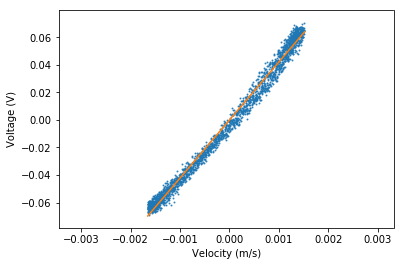

20190429-vel-10.csv
[5.62 5.83 5.91 ... 5.91 5.91 5.89]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
[datetime.datetime(2019, 4, 29, 16, 47, 36, 651000)
 datetime.datetime(2019, 4, 29, 16, 47, 36, 660000)
 datetime.datetime(2019, 4, 29, 16, 47, 36, 670000) ...
 datetime.datetime(2019, 4, 29, 16, 48, 47, 760000)
 datetime.datetime(2019, 4, 29, 16, 48, 47, 770000)
 datetime.datetime(2019, 4, 29, 16, 48, 47, 780000)]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
shift: 11
0.025813850818194827
LinregressResult(slope=38.73889281544746, intercept=-7.613237839425732e-06, rvalue=0.997279700604239, pvalue=0.0, stderr=0.036964292342212116)


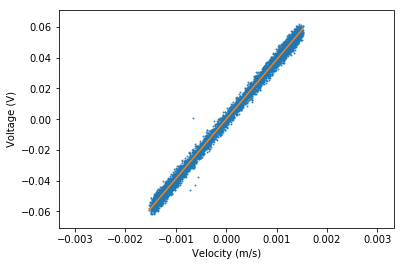

20190429-vel-11.csv
[5.57 5.88 5.88 ... 6.01 6.01 6.01]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
[datetime.datetime(2019, 4, 29, 16, 56, 17, 800000)
 datetime.datetime(2019, 4, 29, 16, 56, 17, 811000)
 datetime.datetime(2019, 4, 29, 16, 56, 17, 820000) ...
 datetime.datetime(2019, 4, 29, 16, 57, 25, 830000)
 datetime.datetime(2019, 4, 29, 16, 57, 25, 841000)
 datetime.datetime(2019, 4, 29, 16, 57, 25, 850000)]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
shift: 11
0.02619408574865175
LinregressResult(slope=38.17655670809093, intercept=1.2176268500147988e-05, rvalue=0.9921061573557026, pvalue=0.0, stderr=0.06395411441666014)


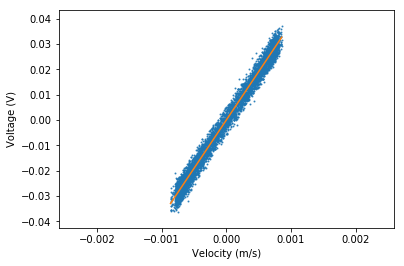

20190429-vel-12.csv
[5.68 5.9  5.81 ... 5.77 5.77 5.77]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
[datetime.datetime(2019, 4, 29, 17, 4, 5, 70000)
 datetime.datetime(2019, 4, 29, 17, 4, 5, 80000)
 datetime.datetime(2019, 4, 29, 17, 4, 5, 90000) ...
 datetime.datetime(2019, 4, 29, 17, 5, 29, 250000)
 datetime.datetime(2019, 4, 29, 17, 5, 29, 260000)
 datetime.datetime(2019, 4, 29, 17, 5, 29, 270000)]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
shift: 11
0.026146301722570795
LinregressResult(slope=38.246326788799735, intercept=4.553752618747477e-07, rvalue=0.9673734515716974, pvalue=0.0, stderr=0.11718842092923892)


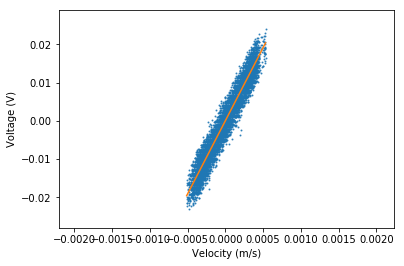

20190429-vel-13.csv
[5.74 5.87 5.81 ... 5.58 5.6  5.6 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
[datetime.datetime(2019, 4, 29, 17, 6, 51, 331000)
 datetime.datetime(2019, 4, 29, 17, 6, 51, 340000)
 datetime.datetime(2019, 4, 29, 17, 6, 51, 350000) ...
 datetime.datetime(2019, 4, 29, 17, 7, 37, 370000)
 datetime.datetime(2019, 4, 29, 17, 7, 37, 380000)
 datetime.datetime(2019, 4, 29, 17, 7, 37, 390000)]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
shift: 12
0.026101314441974707
LinregressResult(slope=38.31224677297687, intercept=1.1253185871027034e-06, rvalue=0.9964385516600334, pvalue=0.0, stderr=0.054856627598335005)


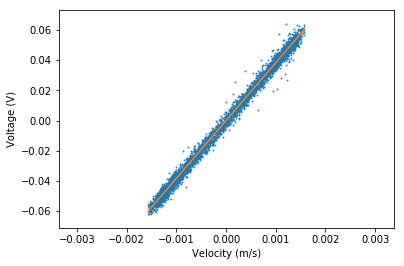

20190429-vel-14.csv
[5.87 5.72 5.95 ... 5.91 5.9  5.89]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
[datetime.datetime(2019, 4, 29, 17, 8, 25, 790000)
 datetime.datetime(2019, 4, 29, 17, 8, 25, 800000)
 datetime.datetime(2019, 4, 29, 17, 8, 25, 810000) ...
 datetime.datetime(2019, 4, 29, 17, 9, 2, 610000)
 datetime.datetime(2019, 4, 29, 17, 9, 2, 620000)
 datetime.datetime(2019, 4, 29, 17, 9, 2, 630000)]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
shift: 11
0.02640488961135734
LinregressResult(slope=37.871773550981914, intercept=4.348739902947728e-06, rvalue=0.9905278025021822, pvalue=0.0, stderr=0.10351969599911916)


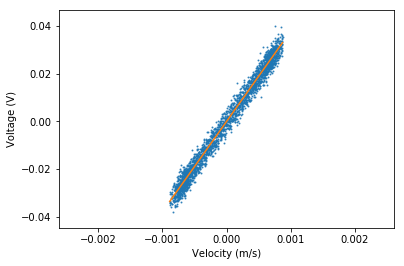

In [42]:
import os
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode


names = []
for name in os.listdir('.'):
    if name.startswith('vel') and name.endswith('.csv'):
#         names.append(name)
        pass
    elif name.endswith('.csv') and name.startswith('2019') and 'vel' in name and '20190429' in name:
        names.append(name)
print(names)
for name in names:
    print(name)
    V = VelocityMode(name, [1000,-100])
#     V.data.savgol_window=11
    V.data.savgol_poly=2
#     V.data.use_savgol=False
    V.data.process()
    print(1/V.data.slope.slope)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    xy = V.data.stage2
#         xy = xy[np.where(xy[:,0]>0)[0]]
    # print(np.where(xy[:,0]>0))
    V.plot_xy_with_regression(xy, ax, [])
    plt.show()

['20190429-vel-1.csv', '20190429-vel-2.csv', '20190429-vel-3.csv', '20190429-vel-4.csv', '20190429-vel-5.csv', '20190429-vel-6.csv', '20190429-vel-7.csv', '20190429-vel-8.csv', '20190429-vel-9.csv', '20190429-vel-10.csv', '20190429-vel-11.csv', '20190429-vel-12.csv', '20190429-vel-13.csv', '20190429-vel-14.csv']
20190429-vel-1.csv
[7.99 4.39 4.87 ... 7.1  7.12 7.12]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
[datetime.datetime(2019, 4, 29, 9, 56, 13, 390000)
 datetime.datetime(2019, 4, 29, 9, 56, 13, 400000)
 datetime.datetime(2019, 4, 29, 9, 56, 13, 410000) ...
 datetime.datetime(2019, 4, 29, 9, 57, 33, 380000)
 datetime.datetime(2019, 4, 29, 9, 57, 33, 390000)
 datetime.datetime(2019, 4, 29, 9, 57, 33, 400000)]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
shift: 11


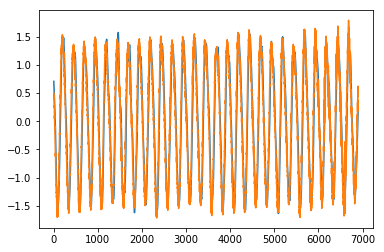

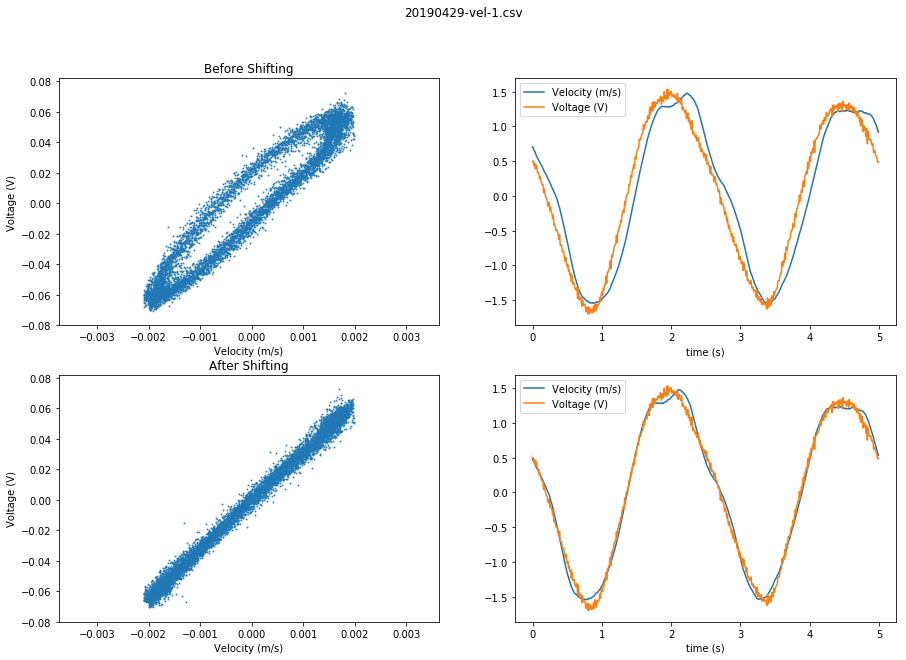

LinregressResult(slope=31.929497941193695, intercept=-1.6438313494979888e-06, rvalue=0.9951270161313825, pvalue=0.0, stderr=0.03812249297292828)


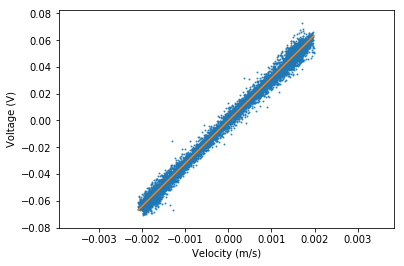

LinregressResult(slope=31.929497941193695, intercept=-1.6438313494979888e-06, rvalue=0.9951270161313825, pvalue=0.0, stderr=0.03812249297292828)
20190429-vel-2.csv
[3.97 3.97 6.12 ... 6.86 6.86 6.86]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
[datetime.datetime(2019, 4, 29, 13, 9, 52, 730000)
 datetime.datetime(2019, 4, 29, 13, 9, 52, 740000)
 datetime.datetime(2019, 4, 29, 13, 9, 52, 750000) ...
 datetime.datetime(2019, 4, 29, 13, 10, 25, 490000)
 datetime.datetime(2019, 4, 29, 13, 10, 25, 501000)
 datetime.datetime(2019, 4, 29, 13, 10, 25, 510000)]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
shift: 11


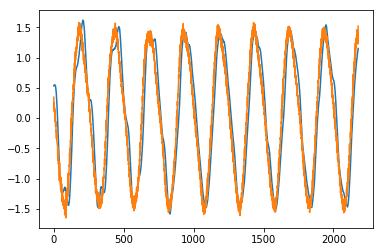

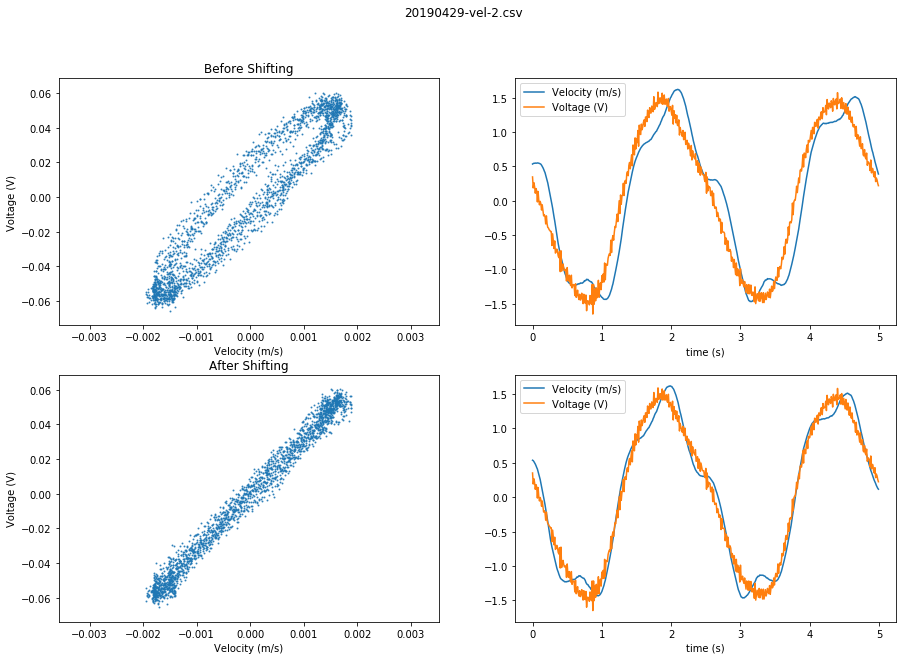

LinregressResult(slope=32.11811637774675, intercept=-5.554654811631304e-05, rvalue=0.9912411904563888, pvalue=0.0, stderr=0.09196577851748085)


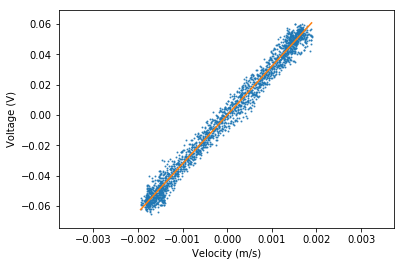

LinregressResult(slope=32.11811637774675, intercept=-5.554654811631304e-05, rvalue=0.9912411904563888, pvalue=0.0, stderr=0.09196577851748085)
20190429-vel-3.csv
[4.87 4.24 5.08 ... 4.95 4.97 4.99]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
[datetime.datetime(2019, 4, 29, 13, 15, 43, 450000)
 datetime.datetime(2019, 4, 29, 13, 15, 43, 460000)
 datetime.datetime(2019, 4, 29, 13, 15, 43, 470000) ...
 datetime.datetime(2019, 4, 29, 13, 16, 32, 20000)
 datetime.datetime(2019, 4, 29, 13, 16, 32, 30000)
 datetime.datetime(2019, 4, 29, 13, 16, 32, 40000)]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
shift: 11


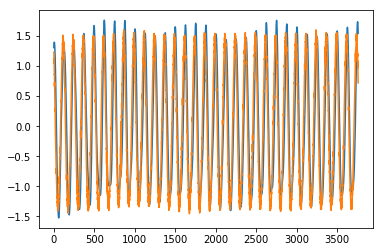

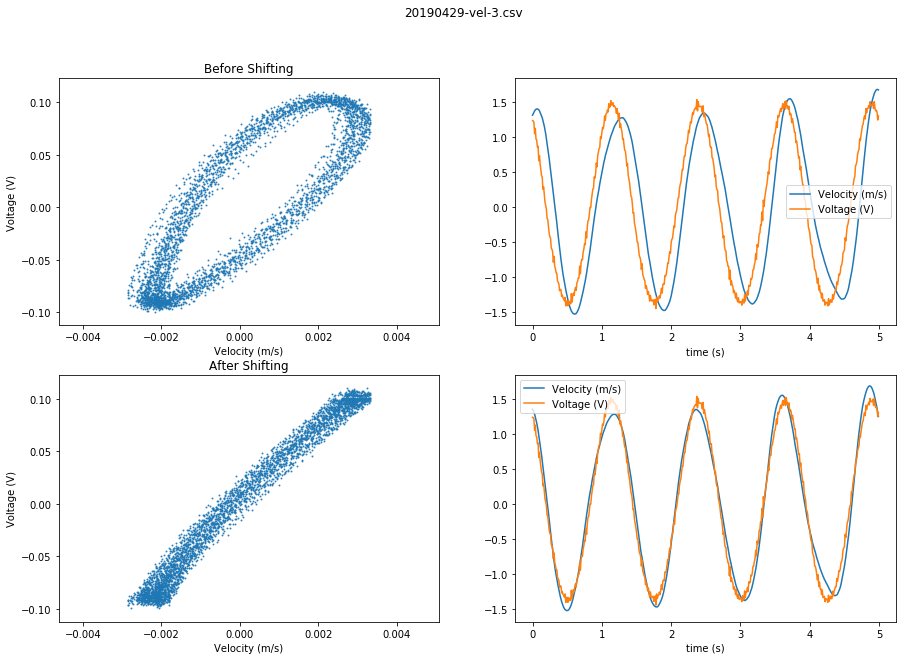

LinregressResult(slope=36.06993370141942, intercept=-0.00012153205517023699, rvalue=0.9874164340620637, pvalue=0.0, stderr=0.09437336688840883)


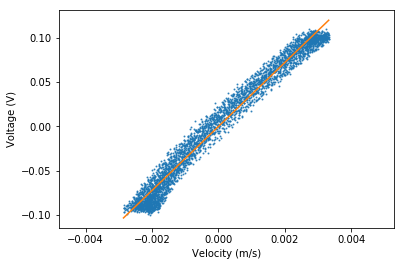

LinregressResult(slope=36.06993370141942, intercept=-0.00012153205517023699, rvalue=0.9874164340620637, pvalue=0.0, stderr=0.09437336688840883)
20190429-vel-4.csv
[3.79 3.77 4.95 ... 5.01 5.03 5.04]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
[datetime.datetime(2019, 4, 29, 13, 22, 53, 400000)
 datetime.datetime(2019, 4, 29, 13, 22, 53, 410000)
 datetime.datetime(2019, 4, 29, 13, 22, 53, 420000) ...
 datetime.datetime(2019, 4, 29, 13, 23, 28, 950000)
 datetime.datetime(2019, 4, 29, 13, 23, 28, 960000)
 datetime.datetime(2019, 4, 29, 13, 23, 28, 970000)]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
shift: 11


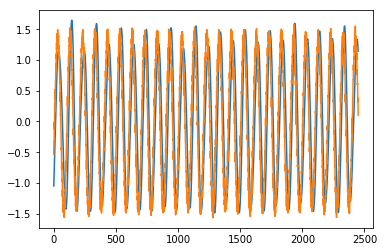

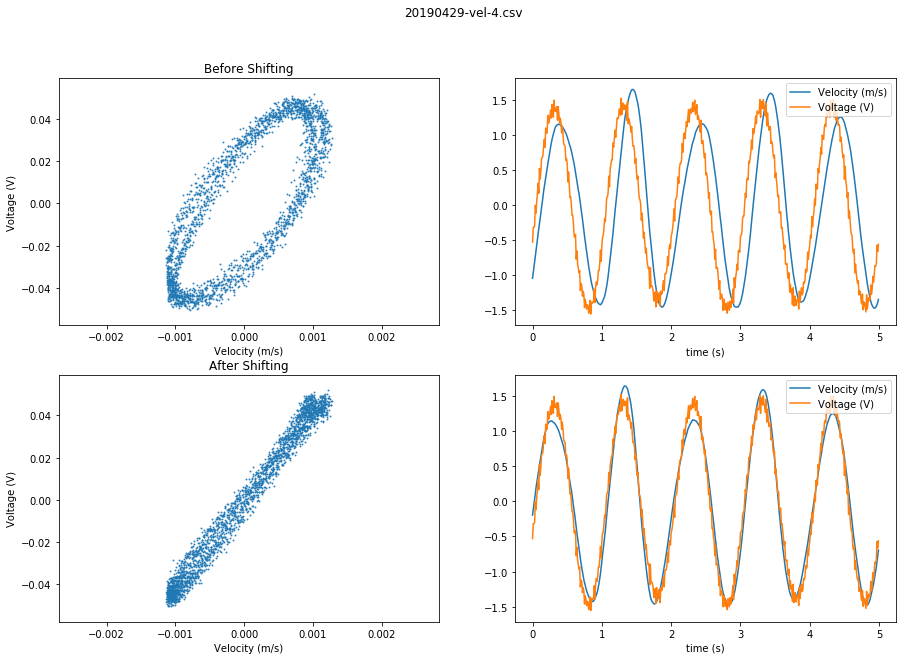

LinregressResult(slope=41.84314126977403, intercept=-3.1936317857492755e-05, rvalue=0.9889304925120531, pvalue=0.0, stderr=0.12717586500068495)


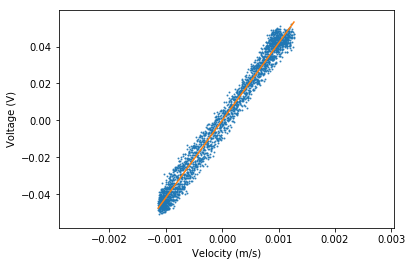

LinregressResult(slope=41.84314126977403, intercept=-3.1936317857492755e-05, rvalue=0.9889304925120531, pvalue=0.0, stderr=0.12717586500068495)
20190429-vel-5.csv
[3.42 4.87 5.78 ... 5.17 5.15 5.15]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
[datetime.datetime(2019, 4, 29, 13, 23, 42, 630000)
 datetime.datetime(2019, 4, 29, 13, 23, 42, 640000)
 datetime.datetime(2019, 4, 29, 13, 23, 42, 650000) ...
 datetime.datetime(2019, 4, 29, 13, 24, 9, 610000)
 datetime.datetime(2019, 4, 29, 13, 24, 9, 620000)
 datetime.datetime(2019, 4, 29, 13, 24, 9, 630000)]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
shift: 11


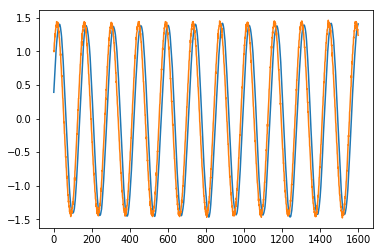

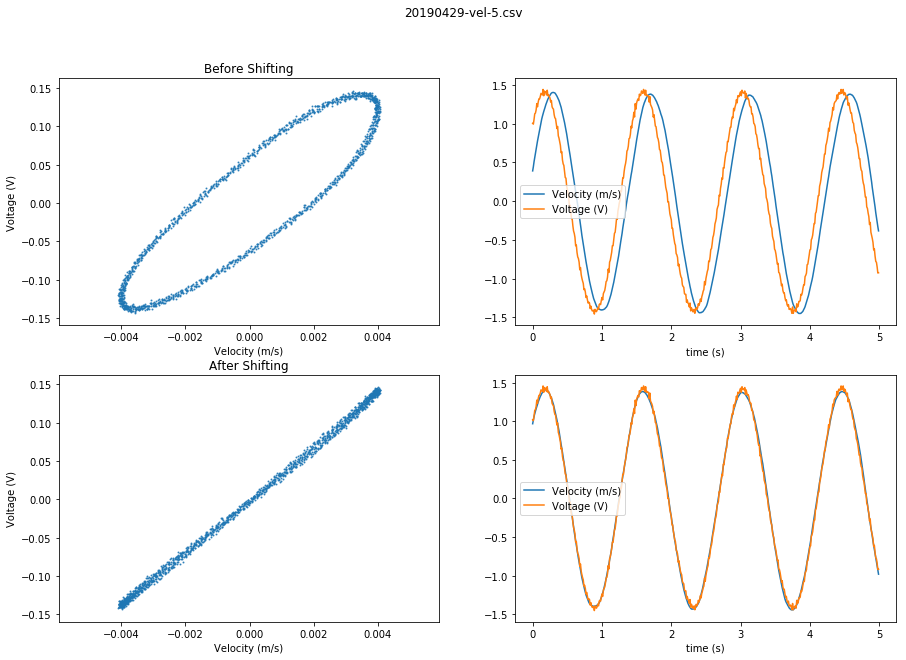

LinregressResult(slope=34.5667288480572, intercept=7.331868516472027e-06, rvalue=0.9991868540700408, pvalue=0.0, stderr=0.03500235476622084)


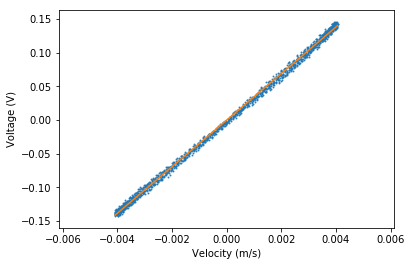

LinregressResult(slope=34.5667288480572, intercept=7.331868516472027e-06, rvalue=0.9991868540700408, pvalue=0.0, stderr=0.03500235476622084)
20190429-vel-6.csv
[4.64 3.86 5.25 ... 4.84 4.81 4.81]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
[datetime.datetime(2019, 4, 29, 13, 24, 27, 100000)
 datetime.datetime(2019, 4, 29, 13, 24, 27, 110000)
 datetime.datetime(2019, 4, 29, 13, 24, 27, 120000) ...
 datetime.datetime(2019, 4, 29, 13, 24, 58, 290000)
 datetime.datetime(2019, 4, 29, 13, 24, 58, 300000)
 datetime.datetime(2019, 4, 29, 13, 24, 58, 310000)]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
shift: 11


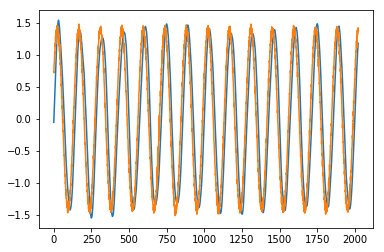

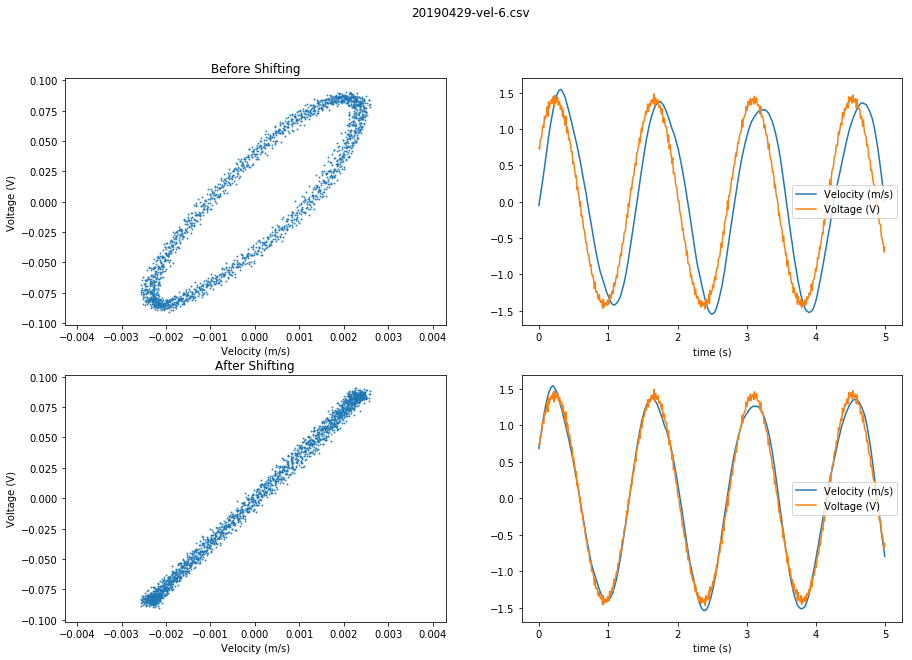

LinregressResult(slope=35.977190764059664, intercept=-3.993975254010289e-05, rvalue=0.9968999530001049, pvalue=0.0, stderr=0.06335020105824803)


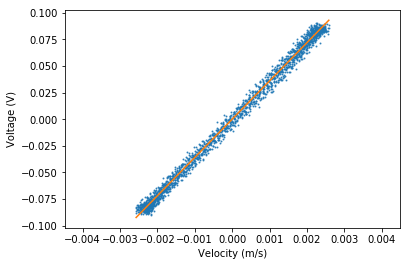

LinregressResult(slope=35.977190764059664, intercept=-3.993975254010289e-05, rvalue=0.9968999530001049, pvalue=0.0, stderr=0.06335020105824803)
20190429-vel-7.csv
[4.09 4.71 5.63 ... 6.34 6.34 6.32]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
[datetime.datetime(2019, 4, 29, 13, 35, 59, 850000)
 datetime.datetime(2019, 4, 29, 13, 35, 59, 860000)
 datetime.datetime(2019, 4, 29, 13, 35, 59, 870000) ...
 datetime.datetime(2019, 4, 29, 13, 36, 46, 10000)
 datetime.datetime(2019, 4, 29, 13, 36, 46, 20000)
 datetime.datetime(2019, 4, 29, 13, 36, 46, 30000)]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
shift: 11


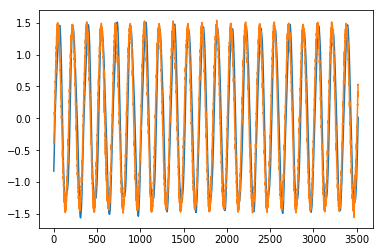

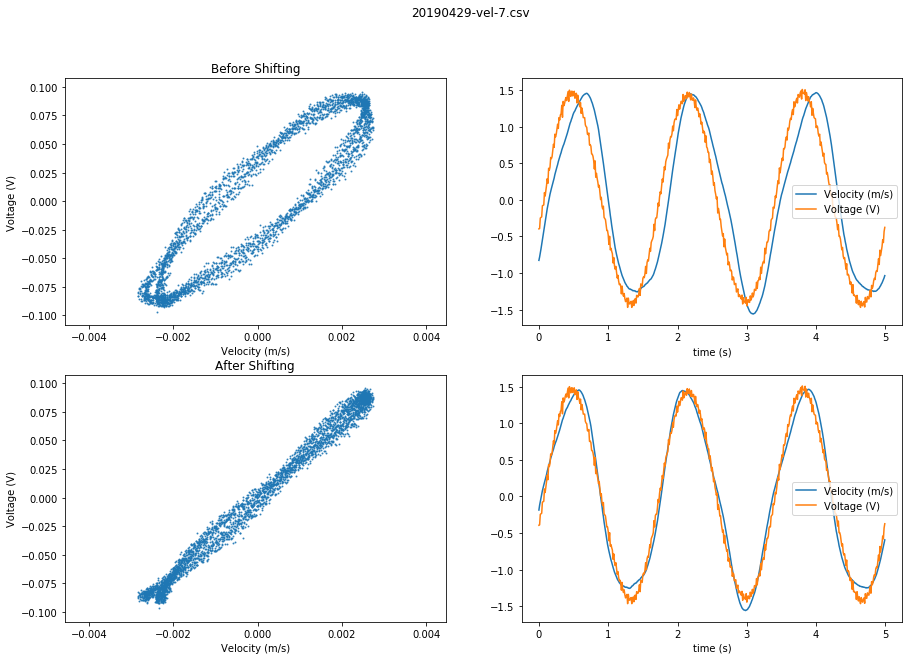

LinregressResult(slope=34.090483161697954, intercept=-4.187747356083118e-05, rvalue=0.9943443587041381, pvalue=0.0, stderr=0.061493808268782424)


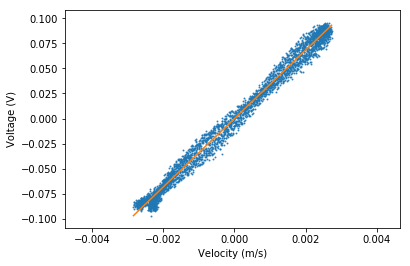

LinregressResult(slope=34.090483161697954, intercept=-4.187747356083118e-05, rvalue=0.9943443587041381, pvalue=0.0, stderr=0.061493808268782424)
20190429-vel-8.csv
[3.74 4.24 5.39 ... 5.9  5.94 5.94]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
[datetime.datetime(2019, 4, 29, 13, 44, 42, 680000)
 datetime.datetime(2019, 4, 29, 13, 44, 42, 691000)
 datetime.datetime(2019, 4, 29, 13, 44, 42, 700000) ...
 datetime.datetime(2019, 4, 29, 13, 45, 23, 290000)
 datetime.datetime(2019, 4, 29, 13, 45, 23, 301000)
 datetime.datetime(2019, 4, 29, 13, 45, 23, 310000)]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
shift: 11


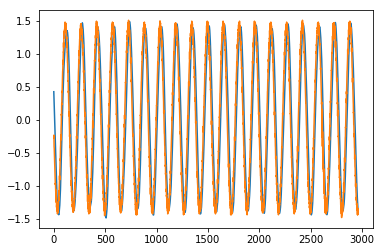

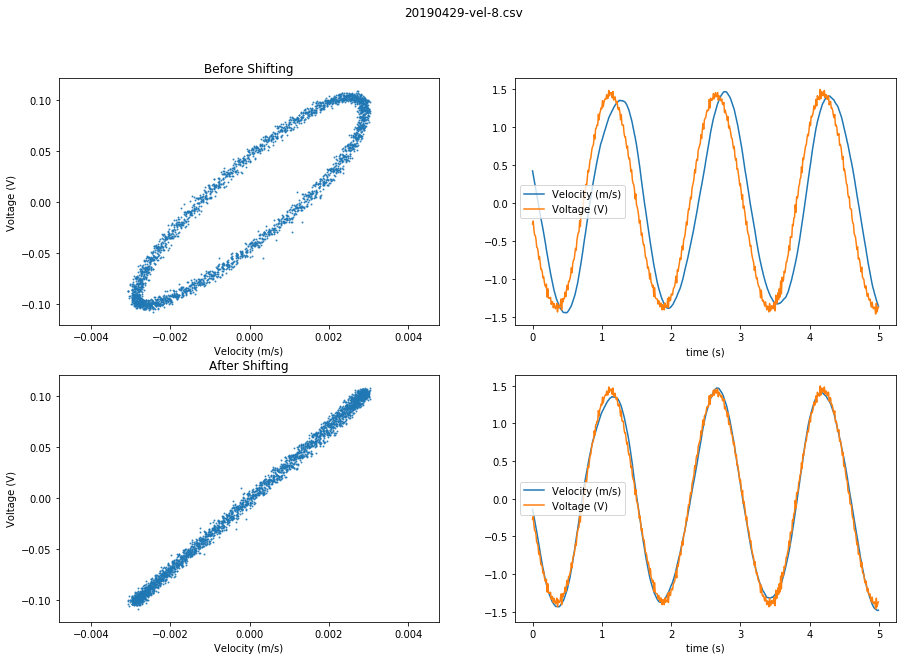

LinregressResult(slope=35.039739974199975, intercept=-5.9073160886803644e-05, rvalue=0.9981104976576503, pvalue=0.0, stderr=0.039708283570154344)


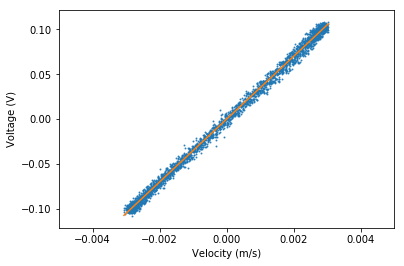

LinregressResult(slope=35.039739974199975, intercept=-5.9073160886803644e-05, rvalue=0.9981104976576503, pvalue=0.0, stderr=0.039708283570154344)
20190429-vel-9.csv
[4.31 4.36 5.59 ... 5.49 5.49 5.46]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
[datetime.datetime(2019, 4, 29, 13, 48, 24, 790000)
 datetime.datetime(2019, 4, 29, 13, 48, 24, 800000)
 datetime.datetime(2019, 4, 29, 13, 48, 24, 810000) ...
 datetime.datetime(2019, 4, 29, 13, 48, 58, 880000)
 datetime.datetime(2019, 4, 29, 13, 48, 58, 890000)
 datetime.datetime(2019, 4, 29, 13, 48, 58, 900000)]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
shift: 11


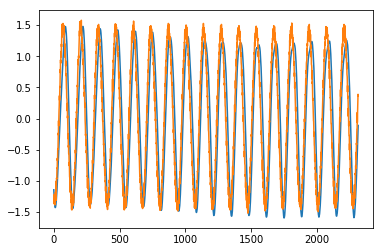

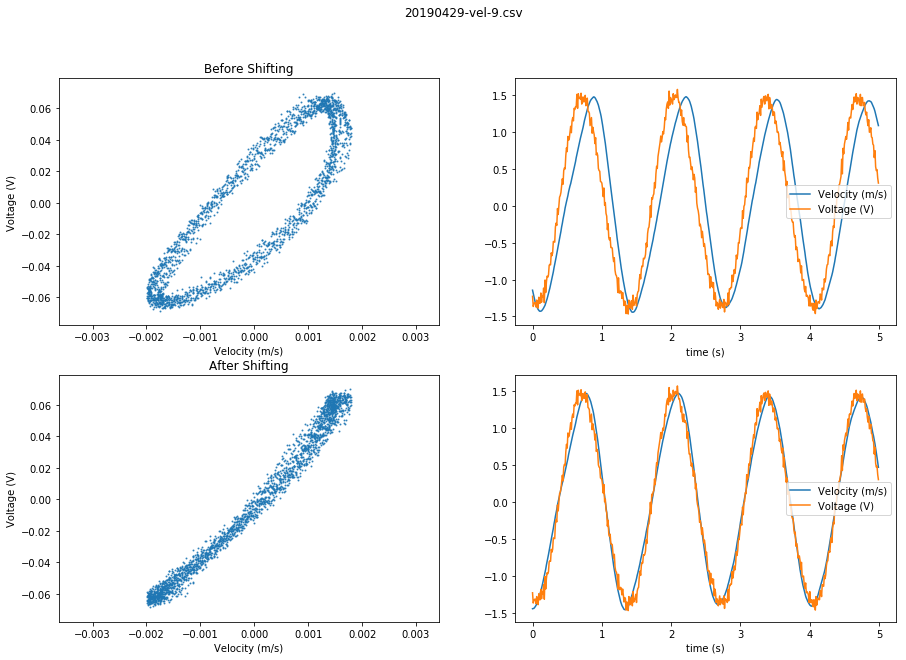

LinregressResult(slope=36.12128219066843, intercept=-5.237566063269429e-05, rvalue=0.989330556385556, pvalue=0.0, stderr=0.11093704986117518)


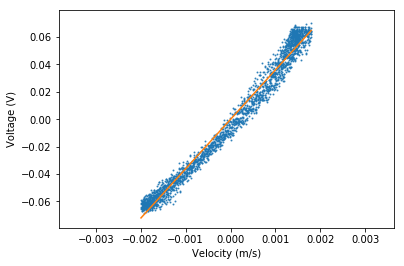

LinregressResult(slope=36.12128219066843, intercept=-5.237566063269429e-05, rvalue=0.989330556385556, pvalue=0.0, stderr=0.11093704986117518)
20190429-vel-10.csv
[5.62 5.83 5.91 ... 5.91 5.91 5.89]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
[datetime.datetime(2019, 4, 29, 16, 47, 36, 651000)
 datetime.datetime(2019, 4, 29, 16, 47, 36, 660000)
 datetime.datetime(2019, 4, 29, 16, 47, 36, 670000) ...
 datetime.datetime(2019, 4, 29, 16, 48, 47, 760000)
 datetime.datetime(2019, 4, 29, 16, 48, 47, 770000)
 datetime.datetime(2019, 4, 29, 16, 48, 47, 780000)]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
shift: 11


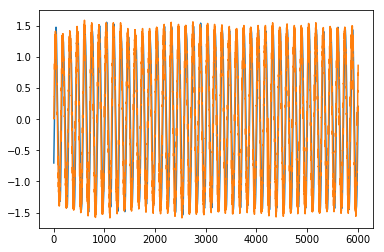

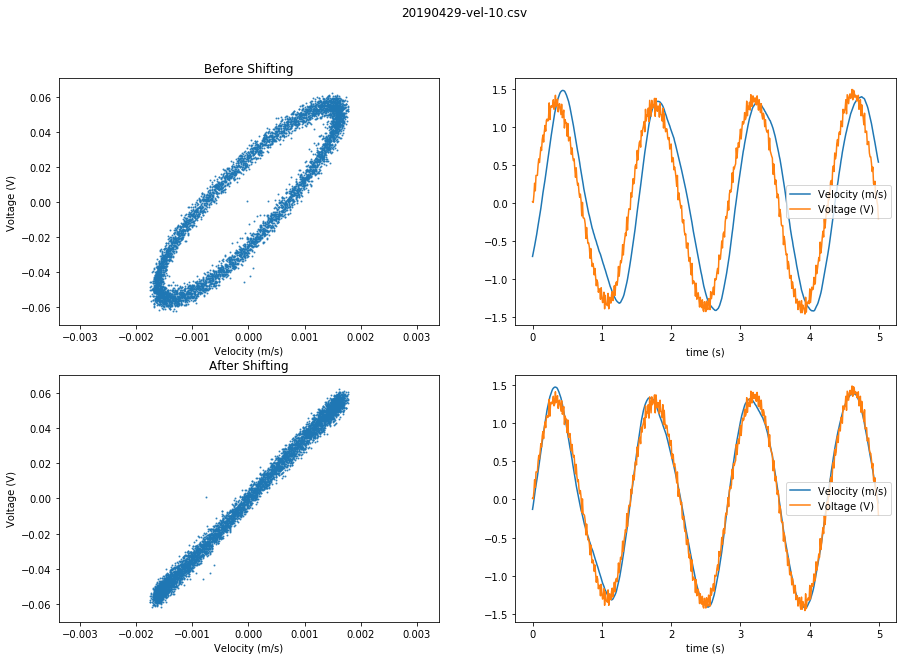

LinregressResult(slope=34.11844715667852, intercept=-8.746962993844644e-06, rvalue=0.9964196219618956, pvalue=0.0, stderr=0.03737332326862712)


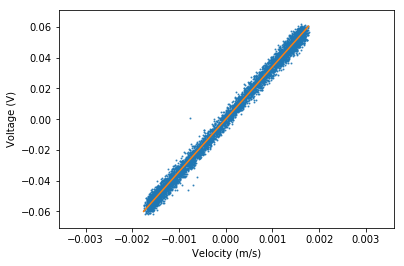

LinregressResult(slope=34.11844715667852, intercept=-8.746962993844644e-06, rvalue=0.9964196219618956, pvalue=0.0, stderr=0.03737332326862712)
20190429-vel-11.csv
[5.57 5.88 5.88 ... 6.01 6.01 6.01]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
[datetime.datetime(2019, 4, 29, 16, 56, 17, 800000)
 datetime.datetime(2019, 4, 29, 16, 56, 17, 811000)
 datetime.datetime(2019, 4, 29, 16, 56, 17, 820000) ...
 datetime.datetime(2019, 4, 29, 16, 57, 25, 830000)
 datetime.datetime(2019, 4, 29, 16, 57, 25, 841000)
 datetime.datetime(2019, 4, 29, 16, 57, 25, 850000)]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
shift: 11


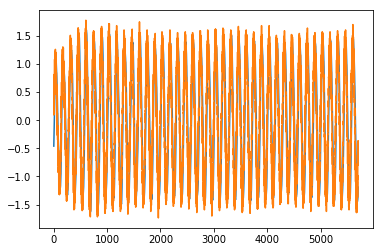

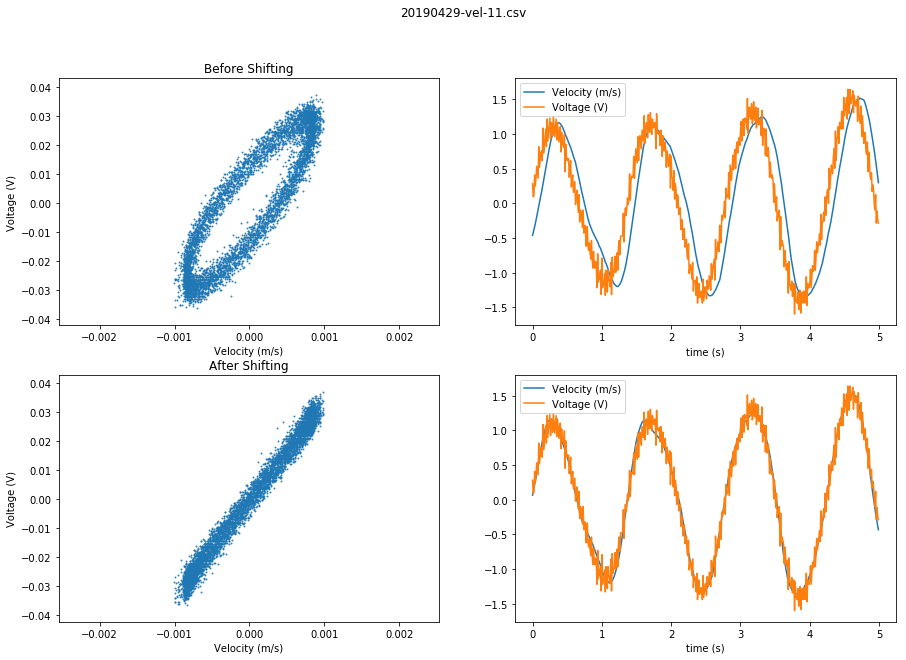

LinregressResult(slope=33.5926364158255, intercept=1.0318168996143592e-05, rvalue=0.9908307425196369, pvalue=0.0, stderr=0.06070972672303432)


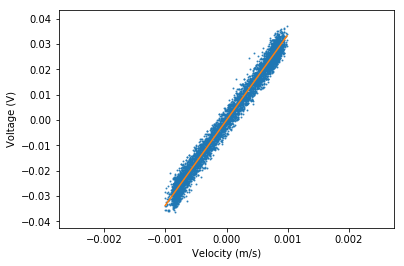

LinregressResult(slope=33.5926364158255, intercept=1.0318168996143592e-05, rvalue=0.9908307425196369, pvalue=0.0, stderr=0.06070972672303432)
20190429-vel-12.csv
[5.68 5.9  5.81 ... 5.77 5.77 5.77]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
[datetime.datetime(2019, 4, 29, 17, 4, 5, 70000)
 datetime.datetime(2019, 4, 29, 17, 4, 5, 80000)
 datetime.datetime(2019, 4, 29, 17, 4, 5, 90000) ...
 datetime.datetime(2019, 4, 29, 17, 5, 29, 250000)
 datetime.datetime(2019, 4, 29, 17, 5, 29, 260000)
 datetime.datetime(2019, 4, 29, 17, 5, 29, 270000)]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
shift: 11


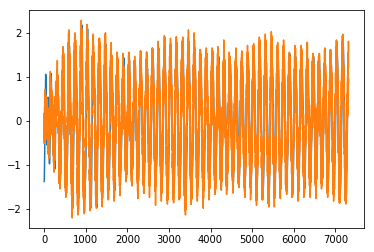

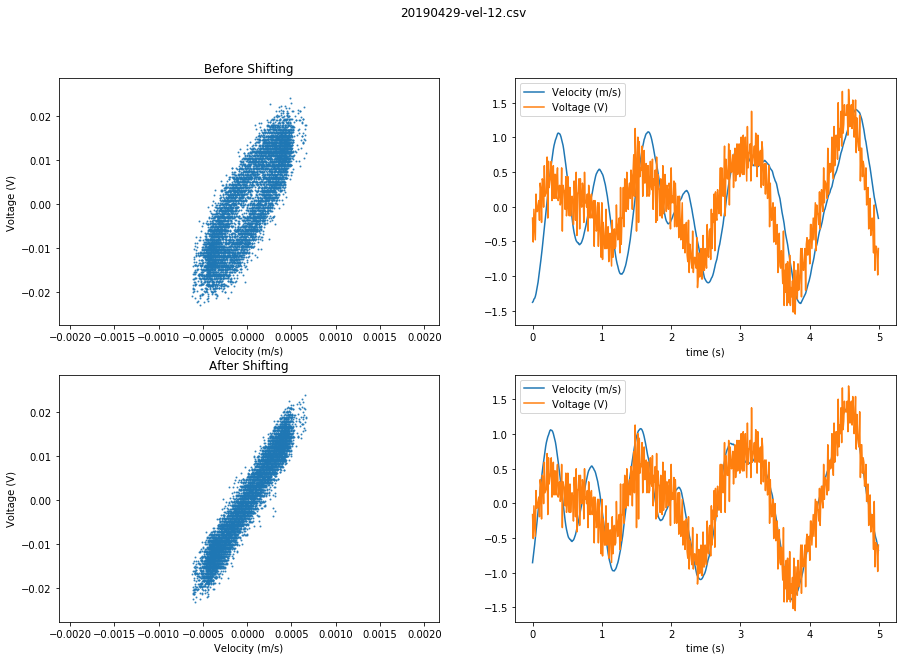

LinregressResult(slope=33.29974887079498, intercept=-4.6615382845231e-06, rvalue=0.9616775627742014, pvalue=0.0, stderr=0.11107389821233102)


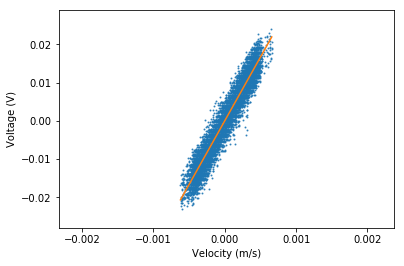

LinregressResult(slope=33.29974887079498, intercept=-4.6615382845231e-06, rvalue=0.9616775627742014, pvalue=0.0, stderr=0.11107389821233102)
20190429-vel-13.csv
[5.74 5.87 5.81 ... 5.58 5.6  5.6 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
[datetime.datetime(2019, 4, 29, 17, 6, 51, 331000)
 datetime.datetime(2019, 4, 29, 17, 6, 51, 340000)
 datetime.datetime(2019, 4, 29, 17, 6, 51, 350000) ...
 datetime.datetime(2019, 4, 29, 17, 7, 37, 370000)
 datetime.datetime(2019, 4, 29, 17, 7, 37, 380000)
 datetime.datetime(2019, 4, 29, 17, 7, 37, 390000)]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
shift: 12


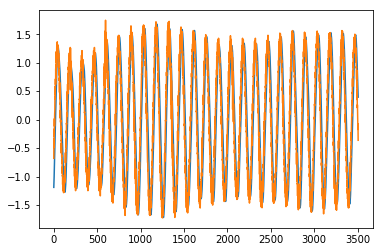

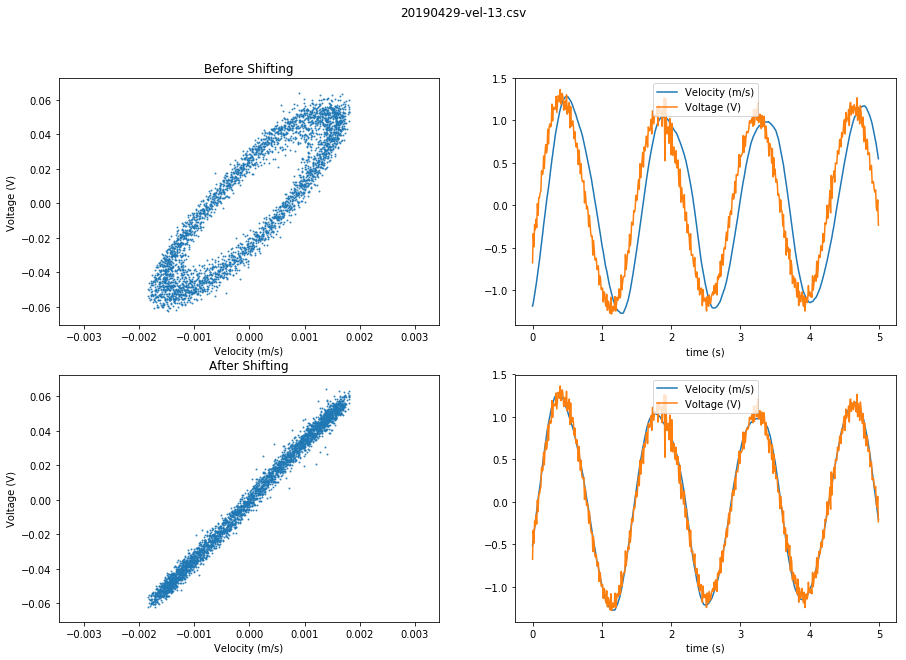

LinregressResult(slope=33.73379959424399, intercept=-3.5731681813854724e-07, rvalue=0.9954617722346801, pvalue=0.0, stderr=0.05456400389328363)


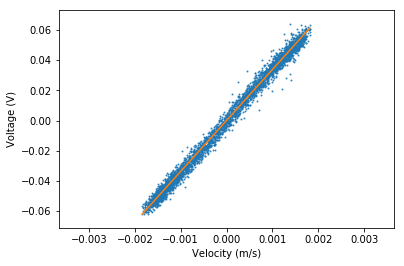

LinregressResult(slope=33.73379959424399, intercept=-3.5731681813854724e-07, rvalue=0.9954617722346801, pvalue=0.0, stderr=0.05456400389328363)
20190429-vel-14.csv
[5.87 5.72 5.95 ... 5.91 5.9  5.89]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
[datetime.datetime(2019, 4, 29, 17, 8, 25, 790000)
 datetime.datetime(2019, 4, 29, 17, 8, 25, 800000)
 datetime.datetime(2019, 4, 29, 17, 8, 25, 810000) ...
 datetime.datetime(2019, 4, 29, 17, 9, 2, 610000)
 datetime.datetime(2019, 4, 29, 17, 9, 2, 620000)
 datetime.datetime(2019, 4, 29, 17, 9, 2, 630000)]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
shift: 11


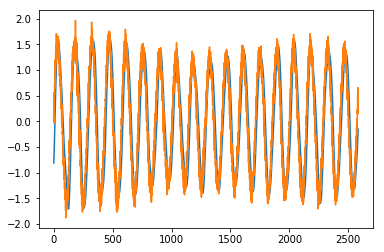

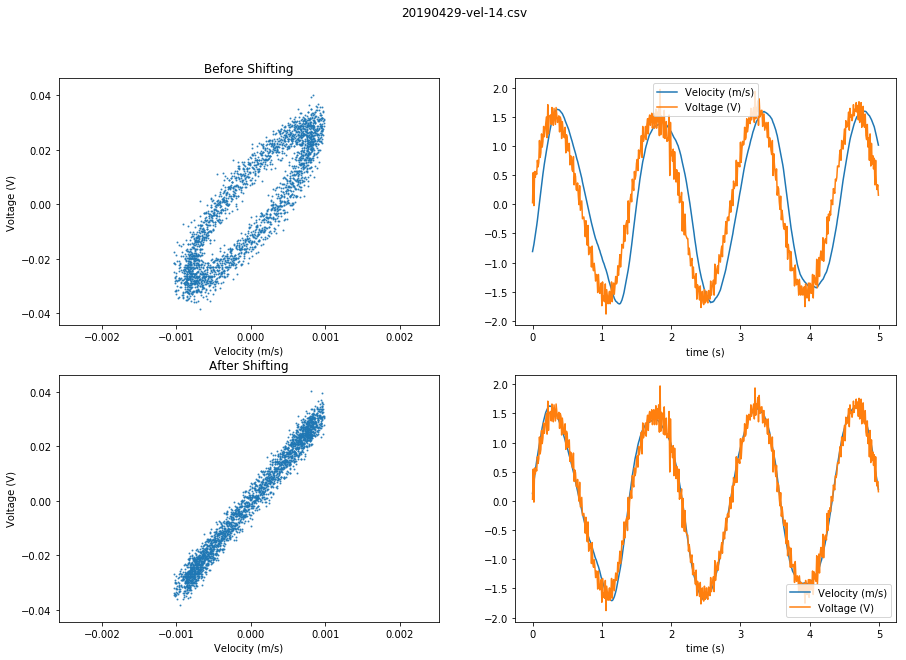

LinregressResult(slope=33.262681952919934, intercept=-4.3846002863002316e-06, rvalue=0.988288017389986, pvalue=0.0, stderr=0.10127286782155795)


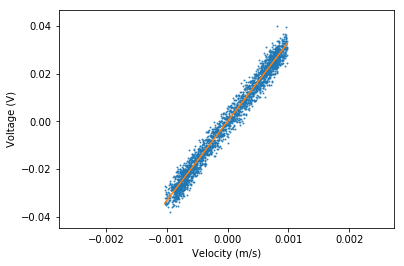

LinregressResult(slope=33.262681952919934, intercept=-4.3846002863002316e-06, rvalue=0.988288017389986, pvalue=0.0, stderr=0.10127286782155795)


In [43]:
import os
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode


names = []
for name in os.listdir('.'):
    if name.startswith('vel') and name.endswith('.csv'):
#         names.append(name)
        pass
    elif name.endswith('.csv') and name.startswith('2019') and 'vel' in name and '20190429' in name:
        names.append(name)
print(names)
for name in names:
    print(name)
    V = VelocityMode(name, [1000,-100])
    V.process()
    plt.show()

[6.22 6.22 6.28 ... 6.69 6.69 6.76]
[0.00622 0.00622 0.00628 ... 0.00669 0.00669 0.00676]
[datetime.datetime(2019, 5, 3, 16, 1, 5, 940000)
 datetime.datetime(2019, 5, 3, 16, 1, 5, 951000)
 datetime.datetime(2019, 5, 3, 16, 1, 5, 960000) ...
 datetime.datetime(2019, 5, 3, 16, 1, 16, 50000)
 datetime.datetime(2019, 5, 3, 16, 1, 16, 60000)
 datetime.datetime(2019, 5, 3, 16, 1, 16, 70000)]
[0.00622 0.00622 0.00628 ... 0.00669 0.00669 0.00676]
shift: 11


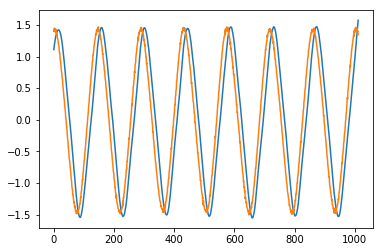

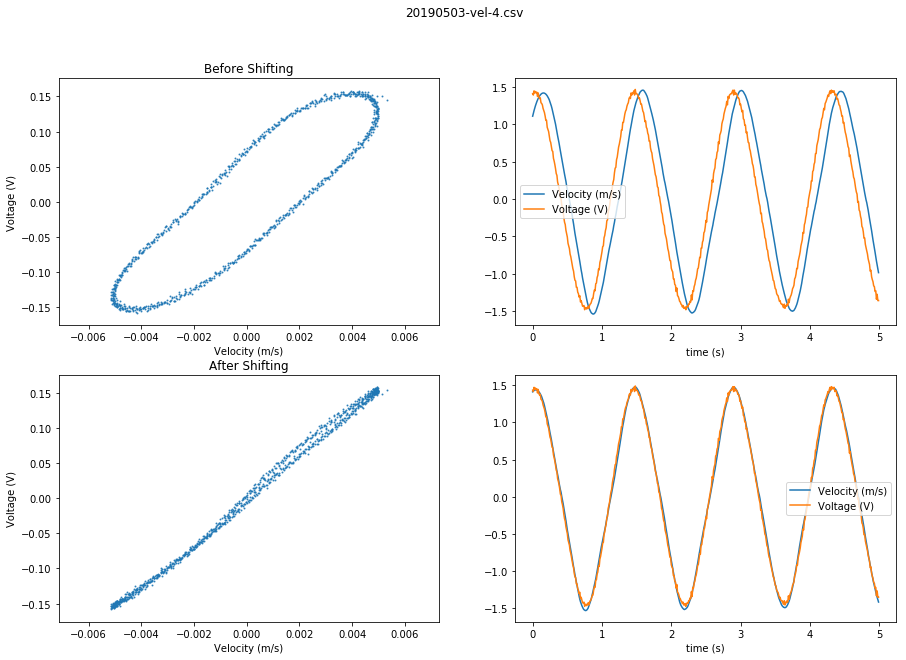

LinregressResult(slope=31.500952151706144, intercept=6.470639535451e-05, rvalue=0.9983229588562146, pvalue=0.0, stderr=0.05779291174552116)


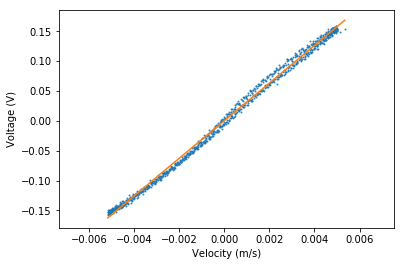

LinregressResult(slope=31.500952151706144, intercept=6.470639535451e-05, rvalue=0.9983229588562146, pvalue=0.0, stderr=0.05779291174552116)


In [6]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-4.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.11 8.14 8.14 ... 7.94 7.92 7.92]
[0.00811 0.00814 0.00814 ... 0.00794 0.00792 0.00792]
[datetime.datetime(2019, 5, 3, 16, 7, 23, 740000)
 datetime.datetime(2019, 5, 3, 16, 7, 23, 750000)
 datetime.datetime(2019, 5, 3, 16, 7, 23, 760000) ...
 datetime.datetime(2019, 5, 3, 16, 7, 36, 20000)
 datetime.datetime(2019, 5, 3, 16, 7, 36, 30000)
 datetime.datetime(2019, 5, 3, 16, 7, 36, 40000)]
[0.00811 0.00814 0.00814 ... 0.00794 0.00792 0.00792]
shift: 10


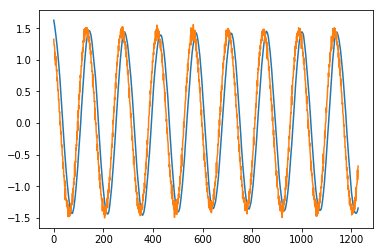

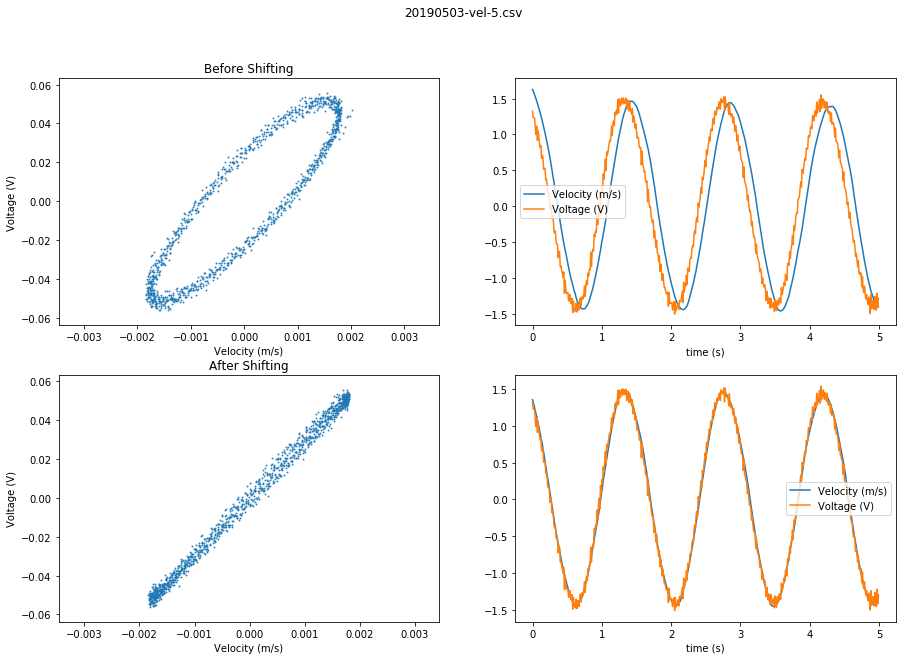

LinregressResult(slope=29.254337533953443, intercept=-6.880330064991608e-05, rvalue=0.99683083625916, pvalue=0.0, stderr=0.06692162704042266)


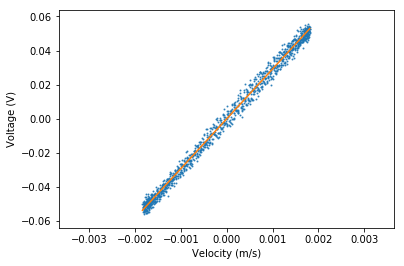

LinregressResult(slope=29.254337533953443, intercept=-6.880330064991608e-05, rvalue=0.99683083625916, pvalue=0.0, stderr=0.06692162704042266)


In [8]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-5.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.53 8.52 8.52 ... 8.22 8.24 8.24]
[0.00853 0.00852 0.00852 ... 0.00822 0.00824 0.00824]
[datetime.datetime(2019, 5, 3, 16, 29, 58, 930000)
 datetime.datetime(2019, 5, 3, 16, 29, 58, 941000)
 datetime.datetime(2019, 5, 3, 16, 29, 58, 950000) ...
 datetime.datetime(2019, 5, 3, 16, 30, 18, 320000)
 datetime.datetime(2019, 5, 3, 16, 30, 18, 330000)
 datetime.datetime(2019, 5, 3, 16, 30, 18, 341000)]
[0.00853 0.00852 0.00852 ... 0.00822 0.00824 0.00824]
shift: 11


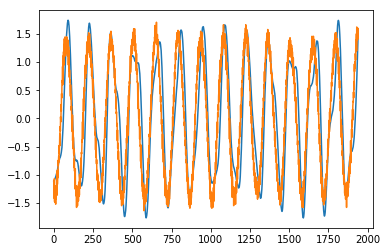

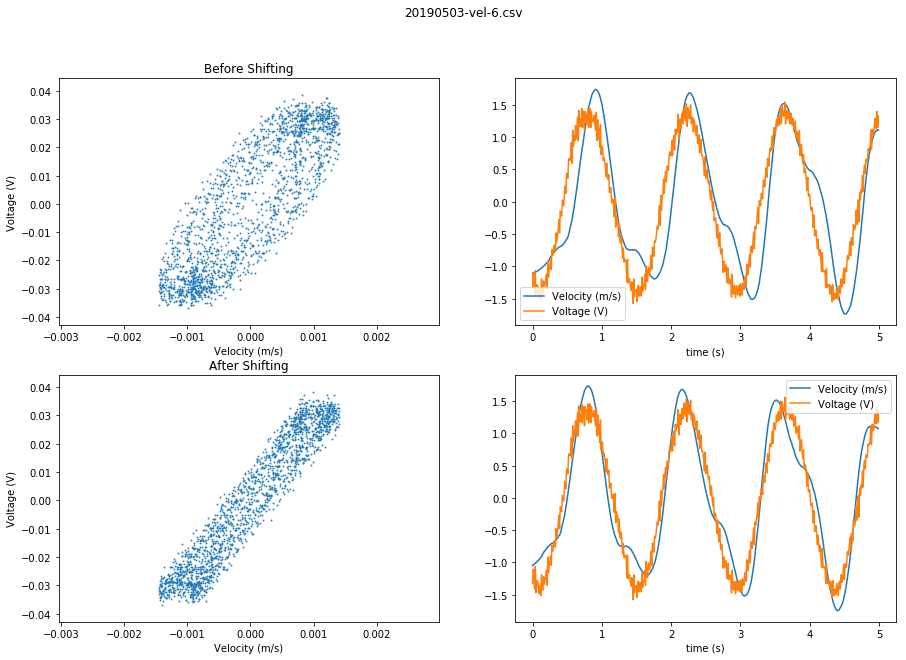

LinregressResult(slope=26.464623237571278, intercept=3.4849701344510426e-05, rvalue=0.9542424105315036, pvalue=0.0, stderr=0.18892391185509147)


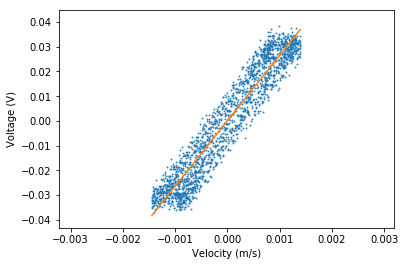

LinregressResult(slope=26.464623237571278, intercept=3.4849701344510426e-05, rvalue=0.9542424105315036, pvalue=0.0, stderr=0.18892391185509147)


In [9]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-6.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]
[datetime.datetime(2019, 5, 3, 17, 6, 48, 151000)
 datetime.datetime(2019, 5, 3, 17, 6, 48, 160000)
 datetime.datetime(2019, 5, 3, 17, 6, 48, 170000) ...
 datetime.datetime(2019, 5, 3, 17, 8, 21, 600000)
 datetime.datetime(2019, 5, 3, 17, 8, 21, 610000)
 datetime.datetime(2019, 5, 3, 17, 8, 21, 620000)]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]
shift: 11


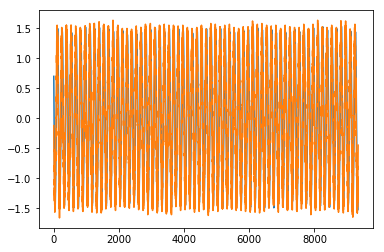

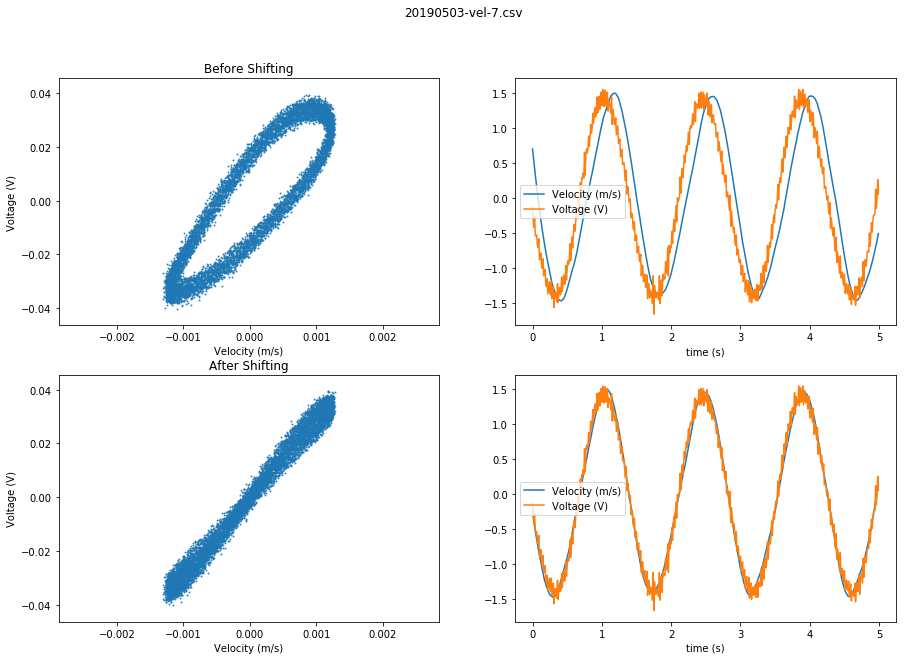

LinregressResult(slope=28.57810365073931, intercept=4.856298673875383e-05, rvalue=0.9918955552873946, pvalue=0.0, stderr=0.03789642841296113)


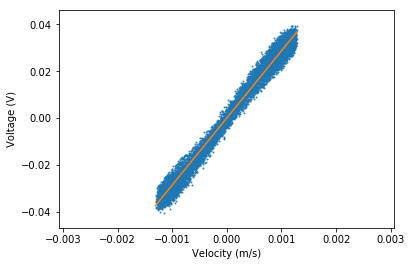

LinregressResult(slope=28.57810365073931, intercept=4.856298673875383e-05, rvalue=0.9918955552873946, pvalue=0.0, stderr=0.03789642841296113)


In [10]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-7.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.3  8.3  8.3  ... 8.59 8.59 8.59]
[0.0083  0.0083  0.0083  ... 0.00859 0.00859 0.00859]
[datetime.datetime(2019, 5, 3, 17, 12, 18, 340000)
 datetime.datetime(2019, 5, 3, 17, 12, 18, 350000)
 datetime.datetime(2019, 5, 3, 17, 12, 18, 360000) ...
 datetime.datetime(2019, 5, 3, 17, 12, 59, 380000)
 datetime.datetime(2019, 5, 3, 17, 12, 59, 390000)
 datetime.datetime(2019, 5, 3, 17, 12, 59, 400000)]
[0.0083  0.0083  0.0083  ... 0.00859 0.00859 0.00859]
shift: 10


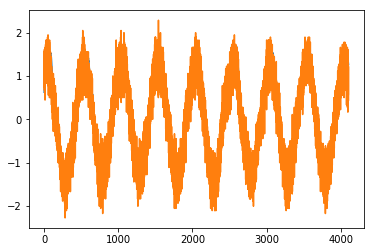

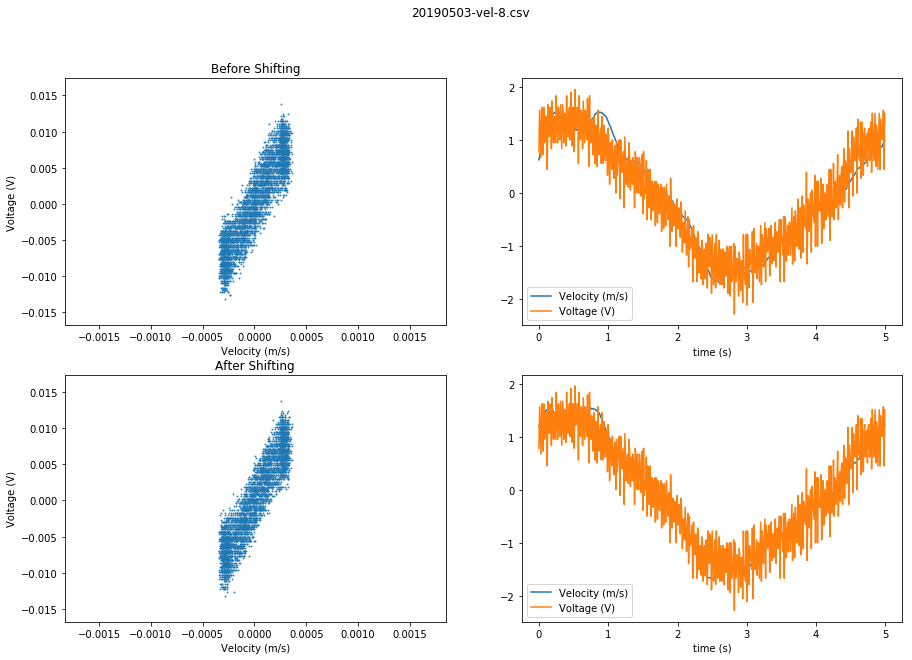

LinregressResult(slope=25.889953931783733, intercept=6.787399737845983e-05, rvalue=0.9189659890012629, pvalue=0.0, stderr=0.17365139388467565)


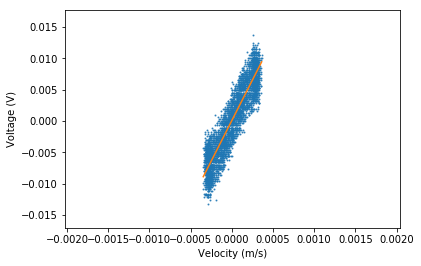

LinregressResult(slope=25.889953931783733, intercept=6.787399737845983e-05, rvalue=0.9189659890012629, pvalue=0.0, stderr=0.17365139388467565)


In [12]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-8.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.38 8.38 8.38 ... 8.66 8.66 8.66]
[0.00838 0.00838 0.00838 ... 0.00866 0.00866 0.00866]
[datetime.datetime(2019, 5, 3, 17, 15, 38, 400000)
 datetime.datetime(2019, 5, 3, 17, 15, 38, 410000)
 datetime.datetime(2019, 5, 3, 17, 15, 38, 420000) ...
 datetime.datetime(2019, 5, 3, 17, 16, 30, 170000)
 datetime.datetime(2019, 5, 3, 17, 16, 30, 180000)
 datetime.datetime(2019, 5, 3, 17, 16, 30, 190000)]
[0.00838 0.00838 0.00838 ... 0.00866 0.00866 0.00866]
shift: 12


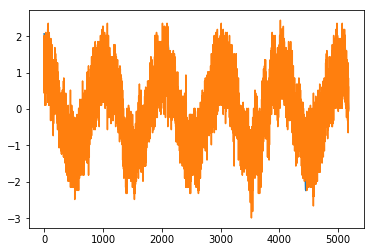

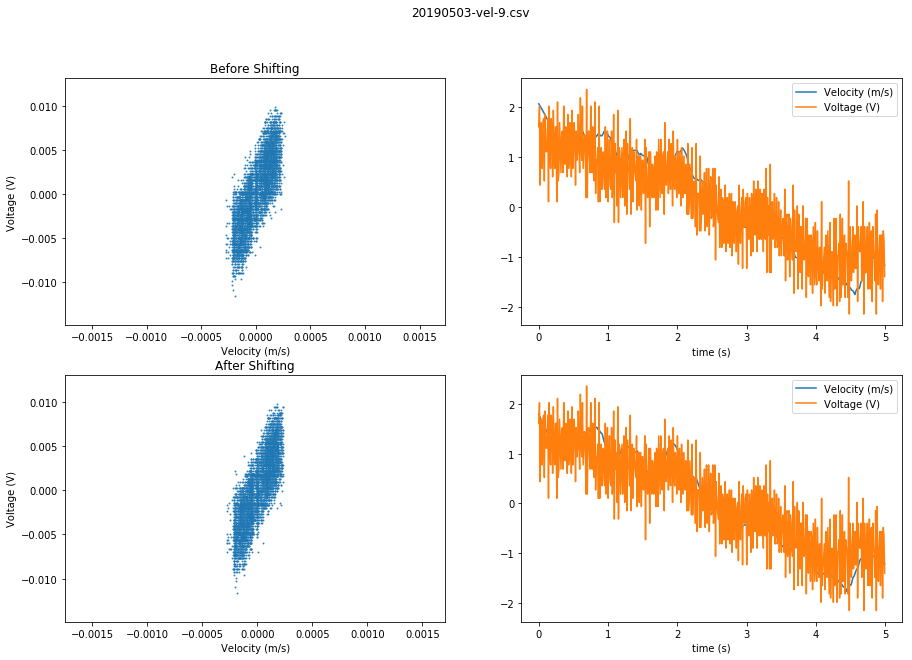

LinregressResult(slope=25.561320667242917, intercept=5.854155094254184e-05, rvalue=0.8092956995377166, pvalue=0.0, stderr=0.2581772425178099)


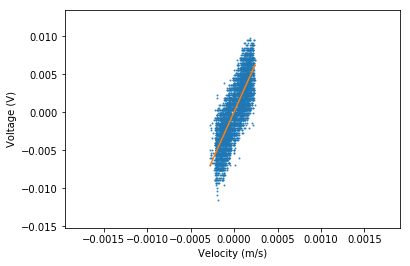

LinregressResult(slope=25.561320667242917, intercept=5.854155094254184e-05, rvalue=0.8092956995377166, pvalue=0.0, stderr=0.2581772425178099)


In [13]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-9.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

In [ ]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-10.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.59 8.59 8.58 ... 8.38 8.37 8.36]
[0.00859 0.00859 0.00858 ... 0.00838 0.00837 0.00836]
[datetime.datetime(2019, 5, 3, 17, 18, 41, 480000)
 datetime.datetime(2019, 5, 3, 17, 18, 41, 490000)
 datetime.datetime(2019, 5, 3, 17, 18, 41, 500000) ...
 datetime.datetime(2019, 5, 3, 17, 19, 28, 490000)
 datetime.datetime(2019, 5, 3, 17, 19, 28, 500000)
 datetime.datetime(2019, 5, 3, 17, 19, 28, 510000)]
[0.00859 0.00859 0.00858 ... 0.00838 0.00837 0.00836]
shift: 11


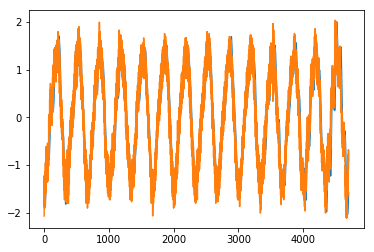

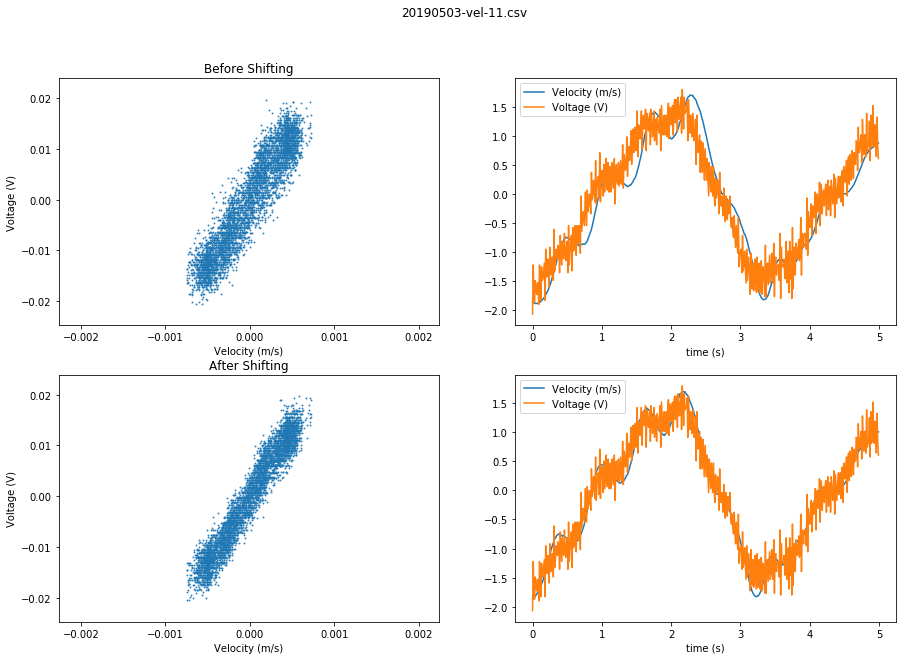

LinregressResult(slope=25.85331049422083, intercept=6.346214928225702e-05, rvalue=0.9647711129958778, pvalue=0.0, stderr=0.10295731251397723)


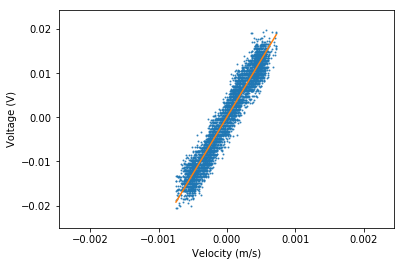

LinregressResult(slope=25.85331049422083, intercept=6.346214928225702e-05, rvalue=0.9647711129958778, pvalue=0.0, stderr=0.10295731251397723)


In [15]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-11.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.62 8.62 8.62 ... 8.66 8.66 8.66]
[0.00862 0.00862 0.00862 ... 0.00866 0.00866 0.00866]
[datetime.datetime(2019, 5, 3, 17, 27, 26, 340000)
 datetime.datetime(2019, 5, 3, 17, 27, 26, 350000)
 datetime.datetime(2019, 5, 3, 17, 27, 26, 360000) ...
 datetime.datetime(2019, 5, 3, 17, 28, 26, 430000)
 datetime.datetime(2019, 5, 3, 17, 28, 26, 440000)
 datetime.datetime(2019, 5, 3, 17, 28, 26, 450000)]
[0.00862 0.00862 0.00862 ... 0.00866 0.00866 0.00866]
shift: 12


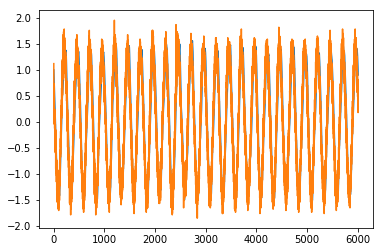

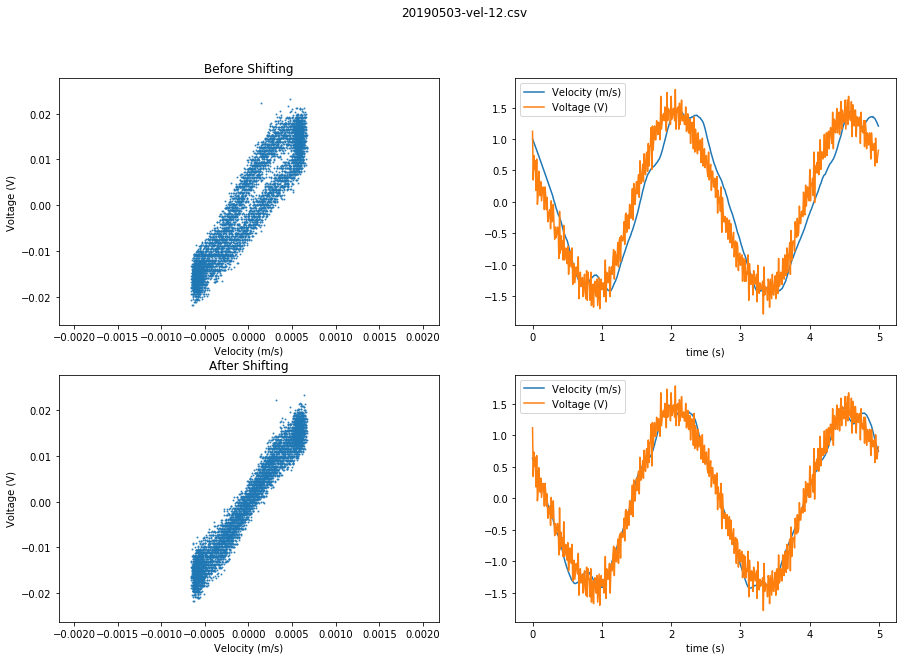

LinregressResult(slope=26.93266577486133, intercept=7.634670791973254e-05, rvalue=0.9786859821628779, pvalue=0.0, stderr=0.07298376486182345)


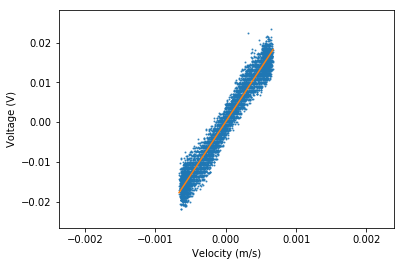

LinregressResult(slope=26.93266577486133, intercept=7.634670791973254e-05, rvalue=0.9786859821628779, pvalue=0.0, stderr=0.07298376486182345)


In [16]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-12.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.36 8.36 8.37 ... 8.37 8.36 8.35]
[0.00836 0.00836 0.00837 ... 0.00837 0.00836 0.00835]
[datetime.datetime(2019, 5, 3, 17, 30, 56, 30000)
 datetime.datetime(2019, 5, 3, 17, 30, 56, 40000)
 datetime.datetime(2019, 5, 3, 17, 30, 56, 50000) ...
 datetime.datetime(2019, 5, 3, 17, 31, 33, 230000)
 datetime.datetime(2019, 5, 3, 17, 31, 33, 240000)
 datetime.datetime(2019, 5, 3, 17, 31, 33, 250000)]
[0.00836 0.00836 0.00837 ... 0.00837 0.00836 0.00835]
shift: 10


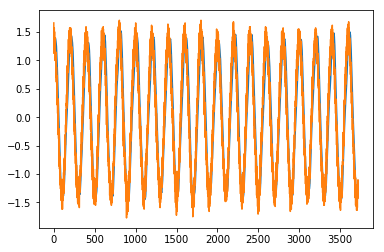

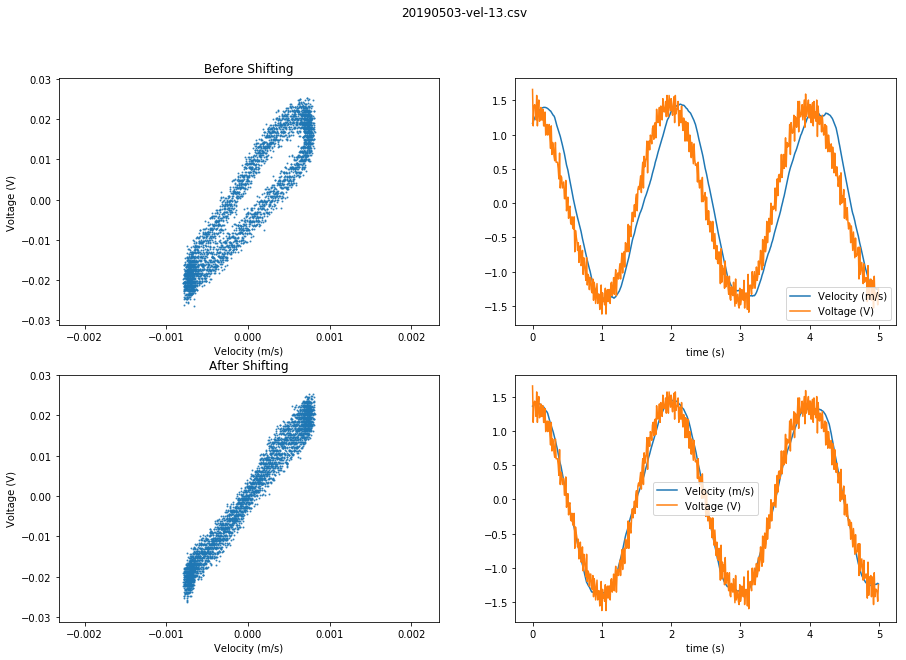

LinregressResult(slope=27.264707574888604, intercept=3.4754100657018554e-05, rvalue=0.9856794192467374, pvalue=0.0, stderr=0.07658992095140602)


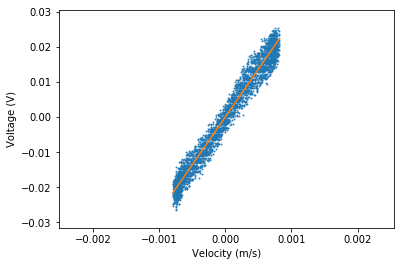

LinregressResult(slope=27.264707574888604, intercept=3.4754100657018554e-05, rvalue=0.9856794192467374, pvalue=0.0, stderr=0.07658992095140602)


In [17]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-13.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.3  8.3  8.28 ... 8.15 8.15 8.16]
[0.0083  0.0083  0.00828 ... 0.00815 0.00815 0.00816]
[datetime.datetime(2019, 5, 3, 17, 33, 56, 800000)
 datetime.datetime(2019, 5, 3, 17, 33, 56, 810000)
 datetime.datetime(2019, 5, 3, 17, 33, 56, 820000) ...
 datetime.datetime(2019, 5, 3, 17, 34, 32, 170000)
 datetime.datetime(2019, 5, 3, 17, 34, 32, 180000)
 datetime.datetime(2019, 5, 3, 17, 34, 32, 190000)]
[0.0083  0.0083  0.00828 ... 0.00815 0.00815 0.00816]
shift: 12


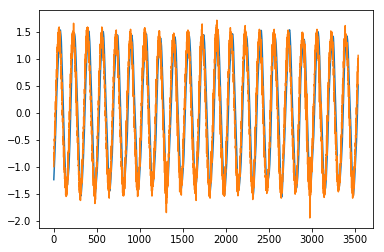

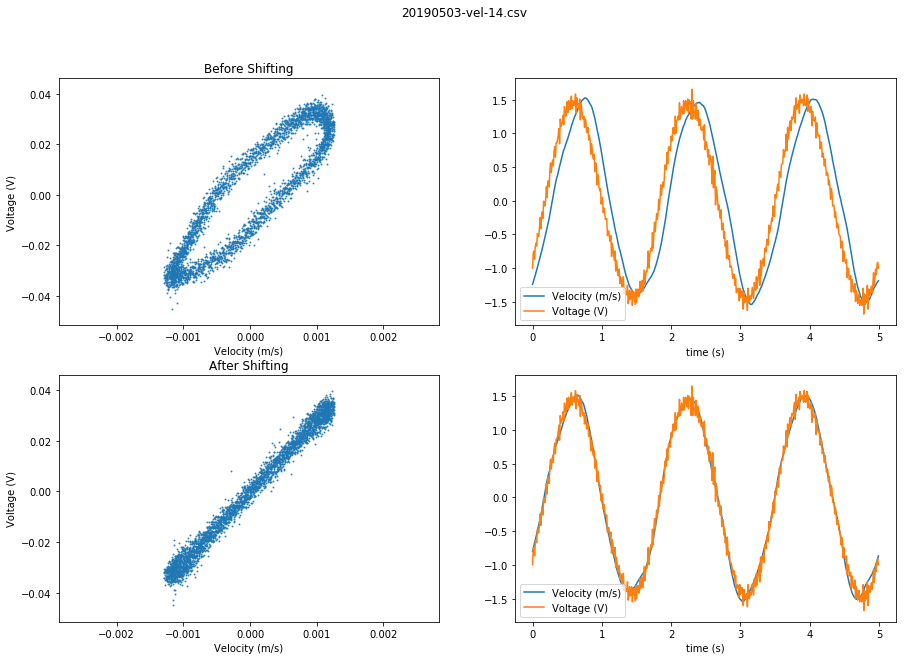

LinregressResult(slope=27.872933644039406, intercept=5.132533581739331e-05, rvalue=0.9926839722153454, pvalue=0.0, stderr=0.05710979589869952)


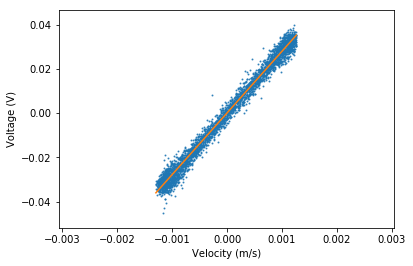

LinregressResult(slope=27.872933644039406, intercept=5.132533581739331e-05, rvalue=0.9926839722153454, pvalue=0.0, stderr=0.05710979589869952)


In [18]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-14.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.44 8.42 8.4  ... 8.67 8.67 8.68]
[0.00844 0.00842 0.0084  ... 0.00867 0.00867 0.00868]
[datetime.datetime(2019, 5, 3, 17, 35, 29, 10000)
 datetime.datetime(2019, 5, 3, 17, 35, 29, 20000)
 datetime.datetime(2019, 5, 3, 17, 35, 29, 30000) ...
 datetime.datetime(2019, 5, 3, 17, 36, 2, 780000)
 datetime.datetime(2019, 5, 3, 17, 36, 2, 790000)
 datetime.datetime(2019, 5, 3, 17, 36, 2, 800000)]
[0.00844 0.00842 0.0084  ... 0.00867 0.00867 0.00868]
shift: 11


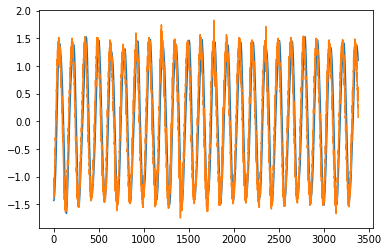

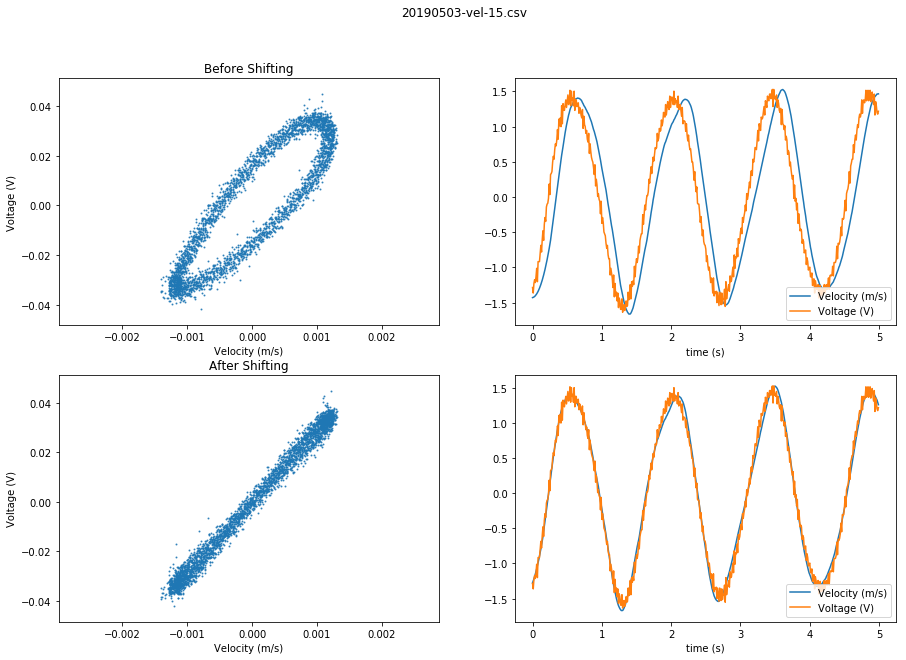

LinregressResult(slope=28.43968691801359, intercept=7.70441239904529e-05, rvalue=0.99291780354026, pvalue=0.0, stderr=0.05866075621630659)


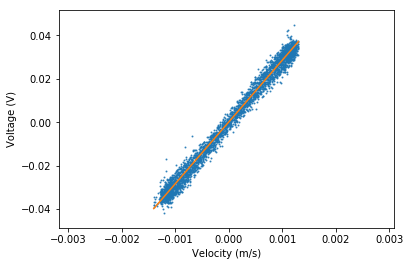

LinregressResult(slope=28.43968691801359, intercept=7.70441239904529e-05, rvalue=0.99291780354026, pvalue=0.0, stderr=0.05866075621630659)


In [19]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-15.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.62 8.62 8.62 ... 8.32 8.32 8.33]
[0.00862 0.00862 0.00862 ... 0.00832 0.00832 0.00833]
[datetime.datetime(2019, 5, 3, 17, 38, 48, 340000)
 datetime.datetime(2019, 5, 3, 17, 38, 48, 350000)
 datetime.datetime(2019, 5, 3, 17, 38, 48, 360000) ...
 datetime.datetime(2019, 5, 3, 17, 39, 26, 720000)
 datetime.datetime(2019, 5, 3, 17, 39, 26, 730000)
 datetime.datetime(2019, 5, 3, 17, 39, 26, 740000)]
[0.00862 0.00862 0.00862 ... 0.00832 0.00832 0.00833]
shift: 12


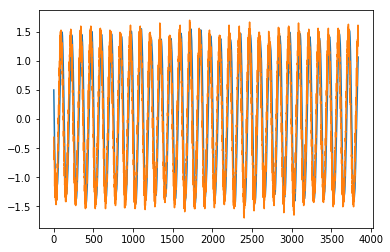

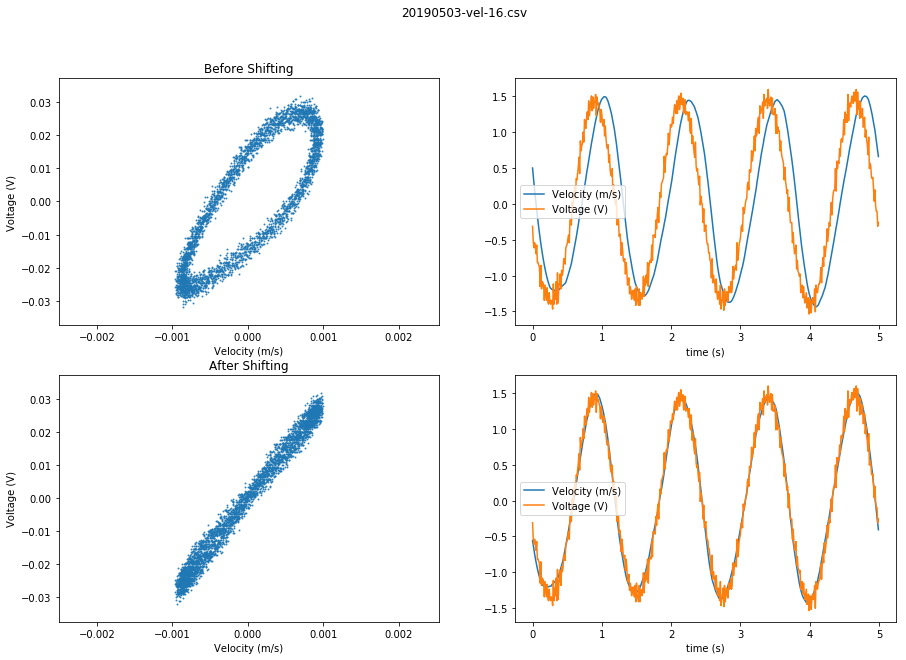

LinregressResult(slope=28.928511002159656, intercept=5.5484078001841815e-05, rvalue=0.9920619470786697, pvalue=0.0, stderr=0.05928979979003498)


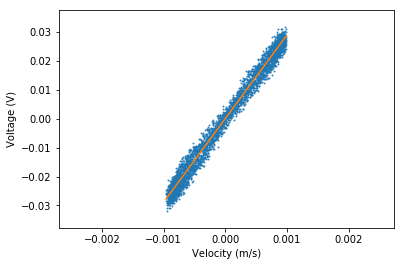

LinregressResult(slope=28.928511002159656, intercept=5.5484078001841815e-05, rvalue=0.9920619470786697, pvalue=0.0, stderr=0.05928979979003498)


In [20]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-16.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.27 8.27 8.28 ... 8.39 8.37 8.35]
[0.00827 0.00827 0.00828 ... 0.00839 0.00837 0.00835]
[datetime.datetime(2019, 5, 3, 17, 40, 57, 290000)
 datetime.datetime(2019, 5, 3, 17, 40, 57, 300000)
 datetime.datetime(2019, 5, 3, 17, 40, 57, 310000) ...
 datetime.datetime(2019, 5, 3, 17, 41, 56, 981000)
 datetime.datetime(2019, 5, 3, 17, 41, 56, 990000)
 datetime.datetime(2019, 5, 3, 17, 41, 57)]
[0.00827 0.00827 0.00828 ... 0.00839 0.00837 0.00835]
shift: 12


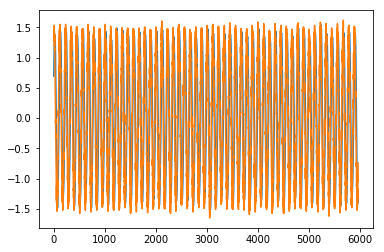

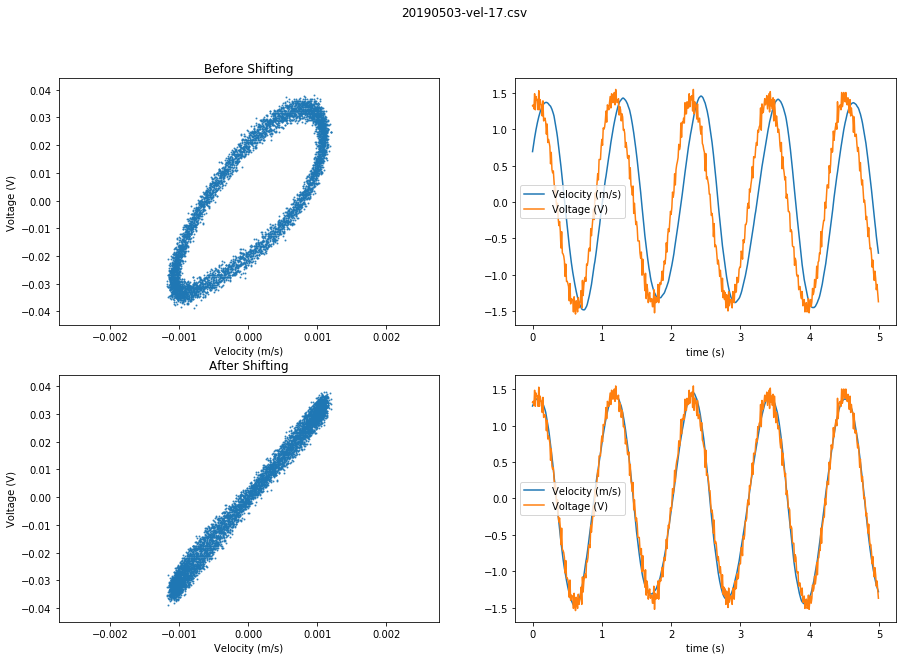

LinregressResult(slope=30.036904433897977, intercept=4.5880022620882606e-05, rvalue=0.9934699871665904, pvalue=0.0, stderr=0.044697676176206756)


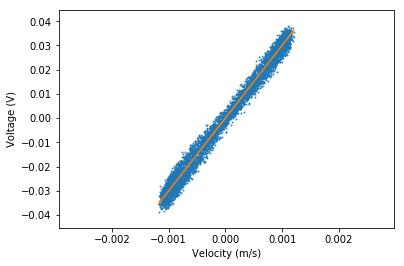

LinregressResult(slope=30.036904433897977, intercept=4.5880022620882606e-05, rvalue=0.9934699871665904, pvalue=0.0, stderr=0.044697676176206756)


In [21]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-17.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

[8.38 8.39 8.39 ... 8.33 8.34 8.34]
[0.00838 0.00839 0.00839 ... 0.00833 0.00834 0.00834]
[datetime.datetime(2019, 5, 3, 17, 44, 22, 400000)
 datetime.datetime(2019, 5, 3, 17, 44, 22, 410000)
 datetime.datetime(2019, 5, 3, 17, 44, 22, 420000) ...
 datetime.datetime(2019, 5, 3, 17, 45, 25, 330000)
 datetime.datetime(2019, 5, 3, 17, 45, 25, 340000)
 datetime.datetime(2019, 5, 3, 17, 45, 25, 350000)]
[0.00838 0.00839 0.00839 ... 0.00833 0.00834 0.00834]
shift: 11


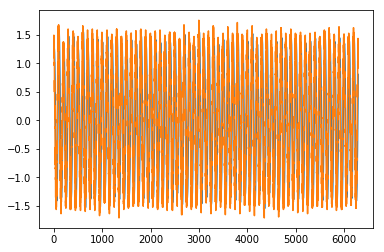

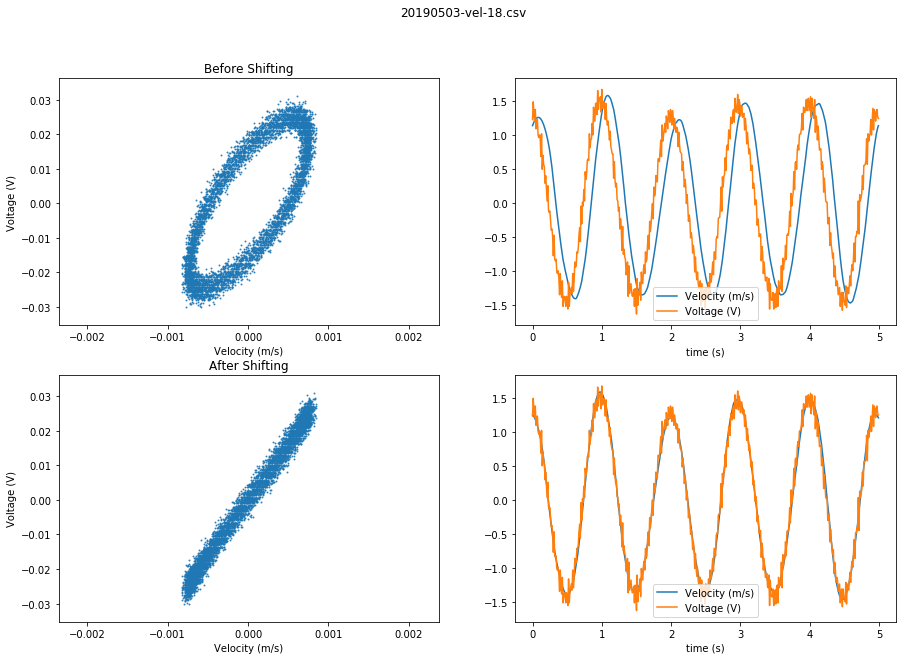

LinregressResult(slope=32.63867403871921, intercept=5.786161509026677e-05, rvalue=0.9922044052744211, pvalue=0.0, stderr=0.051725956946719276)


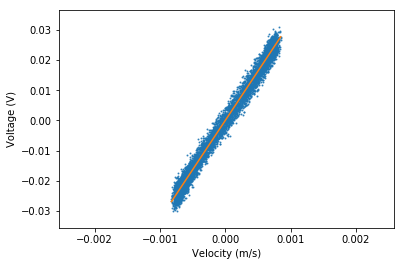

LinregressResult(slope=32.63867403871921, intercept=5.786161509026677e-05, rvalue=0.9922044052744211, pvalue=0.0, stderr=0.051725956946719276)


In [22]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-18.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

In [ ]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('20190503-vel-19.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()